<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_6_17_Desarrollo_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

#### 1. Carga de Librerías

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### 2.1 Carga y análisis inicial de datos

In [ ]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase.shape

(31944, 31)

In [ ]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [ ]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase.isnull().sum()

CODMES                        0
CODSOLICITUD                  0
DEUDA                         0
PLAZO_CREDITO                 0
FLG_GARANTIA                  0
MIN_MES_DE_DEFAULT            0
FLG_DEFAULT_12M               0
SEGMENTOCLIENTE               0
TARJETA_RELACIONADA           0
VEHICULAR_RELACIONADA         0
HIPOTECARIO_RELACIONADA       0
ATRASO_MAXIMO_ULT_6M          0
ATRASO_MAXIMO_ULT_12M         3
ATRASO_MAXIMO_ULT_24M         7
MESES_AHORROS_ULT_6M        678
MEDIANA_AHORROS_ULT_6M        2
DEUDA_TOTAL_SISTEMA        3181
CLASIF_SISTEMA_ULT_12M        0
FLG_PDH                       0
NUMERO_DE_PAGOS_PDH           0
MONTO_TC_SISTEMA              0
INGRESO_CLIENTE             778
PROFESION                   340
ZONA_DEL_DESEMBOLSO         990
ESTADO_CIVIL                990
EDAD_T                      990
CUOTA                       650
LINEA_DE_TC                 650
MONTO_TC_MEMBRESIA          650
FLG_TC_VISA                   0
FLG_TC_MC                     0
dtype: i

In [ ]:
df_clase.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ATRASO_MAXIMO_ULT_6M,31944.0,0.254070,3.028339,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,31941.0,1.074168,38.857057,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,31937.0,2.107931,47.275929,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,31266.0,5.157935,1.449751,1.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,31942.0,7161.642671,8621.384272,0.000000,1703.222083,4325.187267,9396.200433,8.185772e+05
DEUDA_TOTAL_SISTEMA,28763.0,24409.216018,58799.081039,0.000000,1505.645000,6745.890000,20973.860000,1.458561e+06
NUMERO_DE_PAGOS_PDH,31944.0,16.291948,9.419303,0.000000,7.000000,24.000000,24.000000,2.400000e+01


In [ ]:
var_num= df_clase.select_dtypes(include = ["number"])
var_num.head()

,DEUDA,PLAZO_CREDITO,FLG_DEFAULT_12M,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
0,7116.681318,48,0,0,0.0,0.0,6.0,3772.486272,5450.35,24,4067.03,2526.246600,26.0,236.983971,5600.0,170.0
1,1616.555000,60,0,0,0.0,0.0,6.0,8389.745000,0.00,24,0.00,2895.761372,49.0,62.089650,19250.0,170.0
2,8082.775000,48,0,0,0.0,0.0,6.0,1842.695000,0.00,13,0.00,1474.419056,33.0,22.894893,10900.0,80.0
3,10186.990760,48,1,0,0.0,0.0,6.0,4514.070000,5661.25,24,0.00,1992.756892,25.0,244.267800,10900.0,80.0
4,10777.033330,48,0,0,0.0,0.0,6.0,7848.908333,0.00,6,0.00,1680.938223,57.0,17.430000,16300.0,170.0


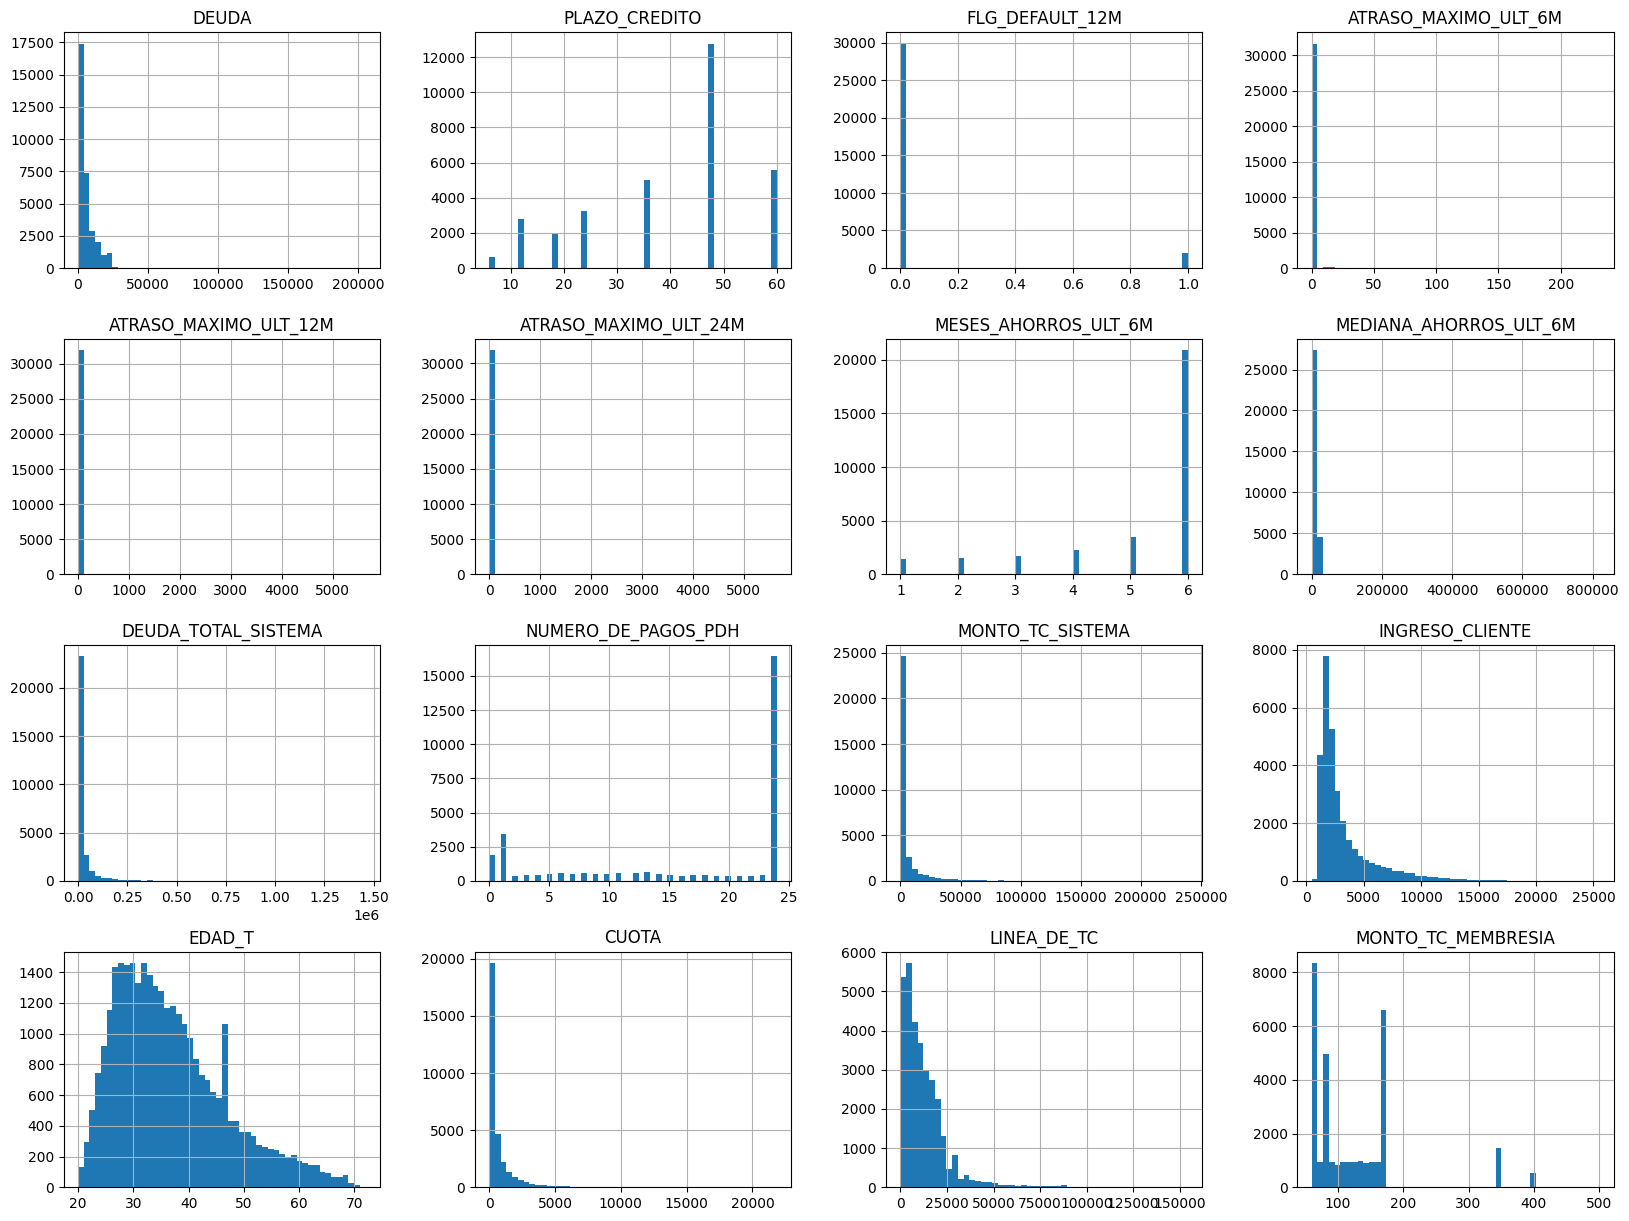

In [ ]:
df_clase[var_num.columns].hist(bins = 50, figsize=(20,15))
plt.show()

In [ ]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

0    29920
1     2024
Name: FLG_DEFAULT_12M, dtype: int64

# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


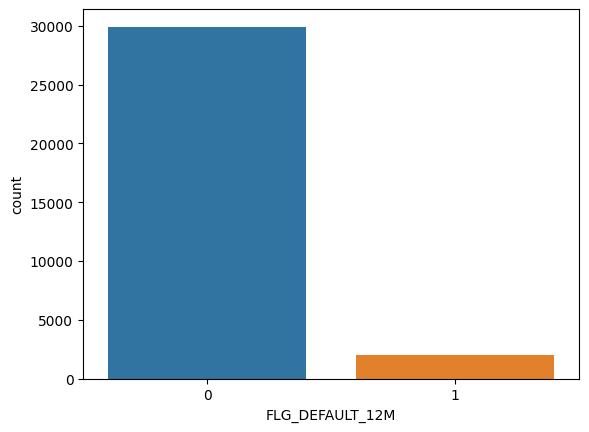

In [ ]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

### 2.2 Analicemos la volumetría en el tiempo

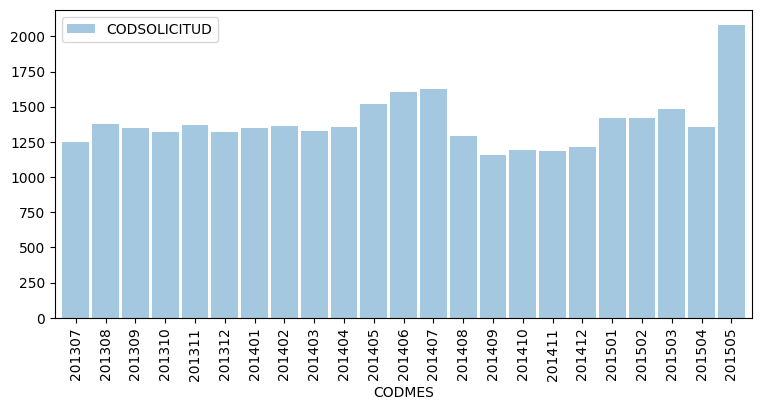

In [ ]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

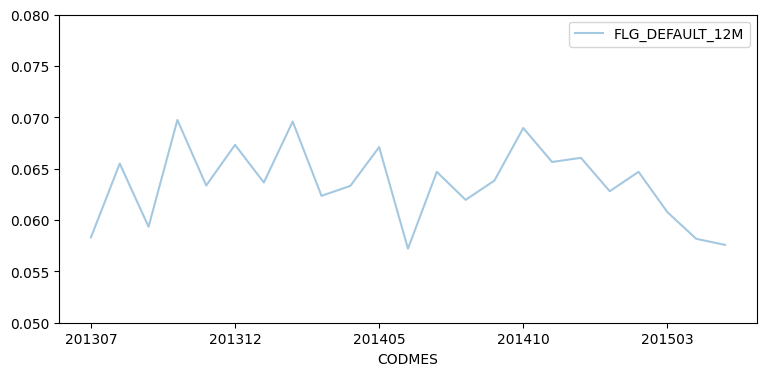

In [ ]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

# 3. Analisis Exploratorio (EDA)

#### 3.1 Análisis Univariado

### Valores Perdidos (Missing)

In [ ]:
import missingno as msno

<Axes: >

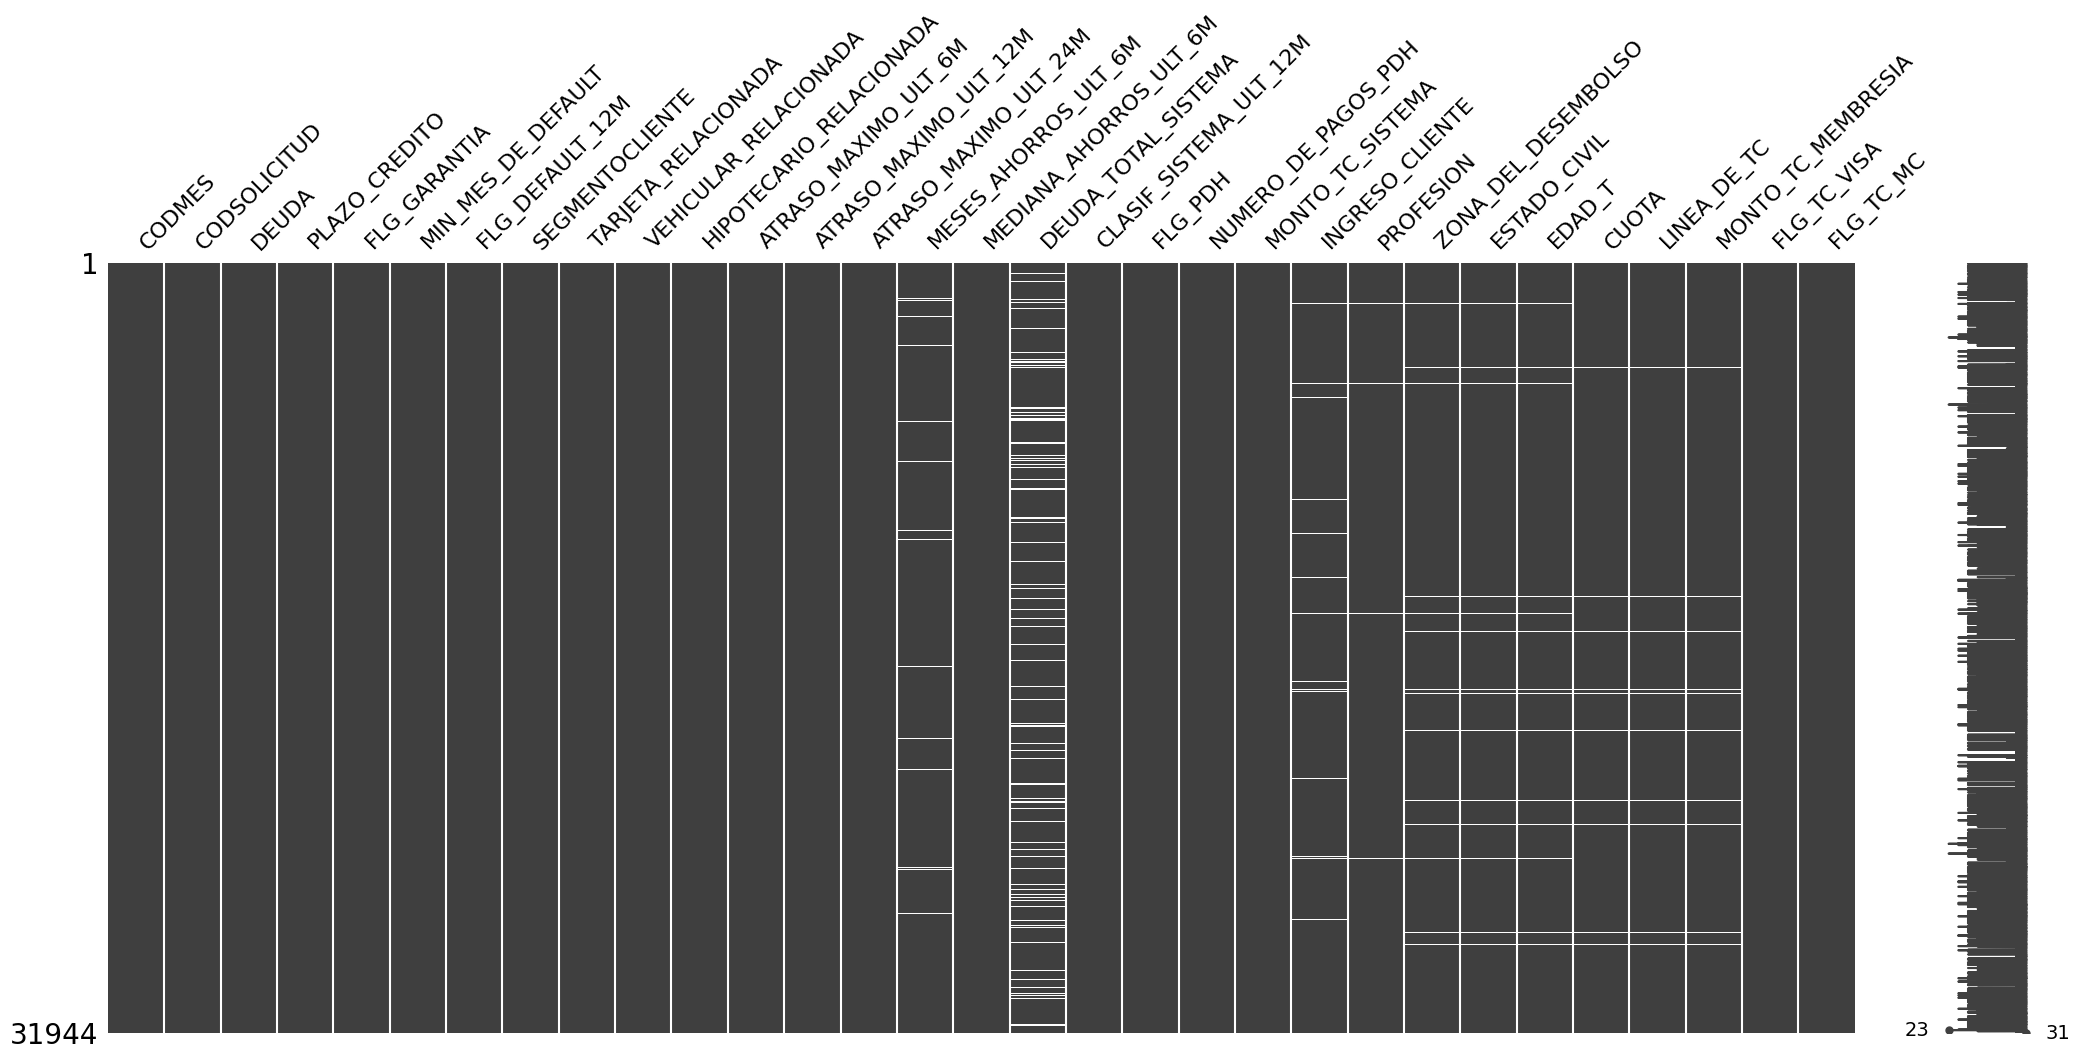

In [ ]:
msno.matrix(df_clase)

<Axes: >

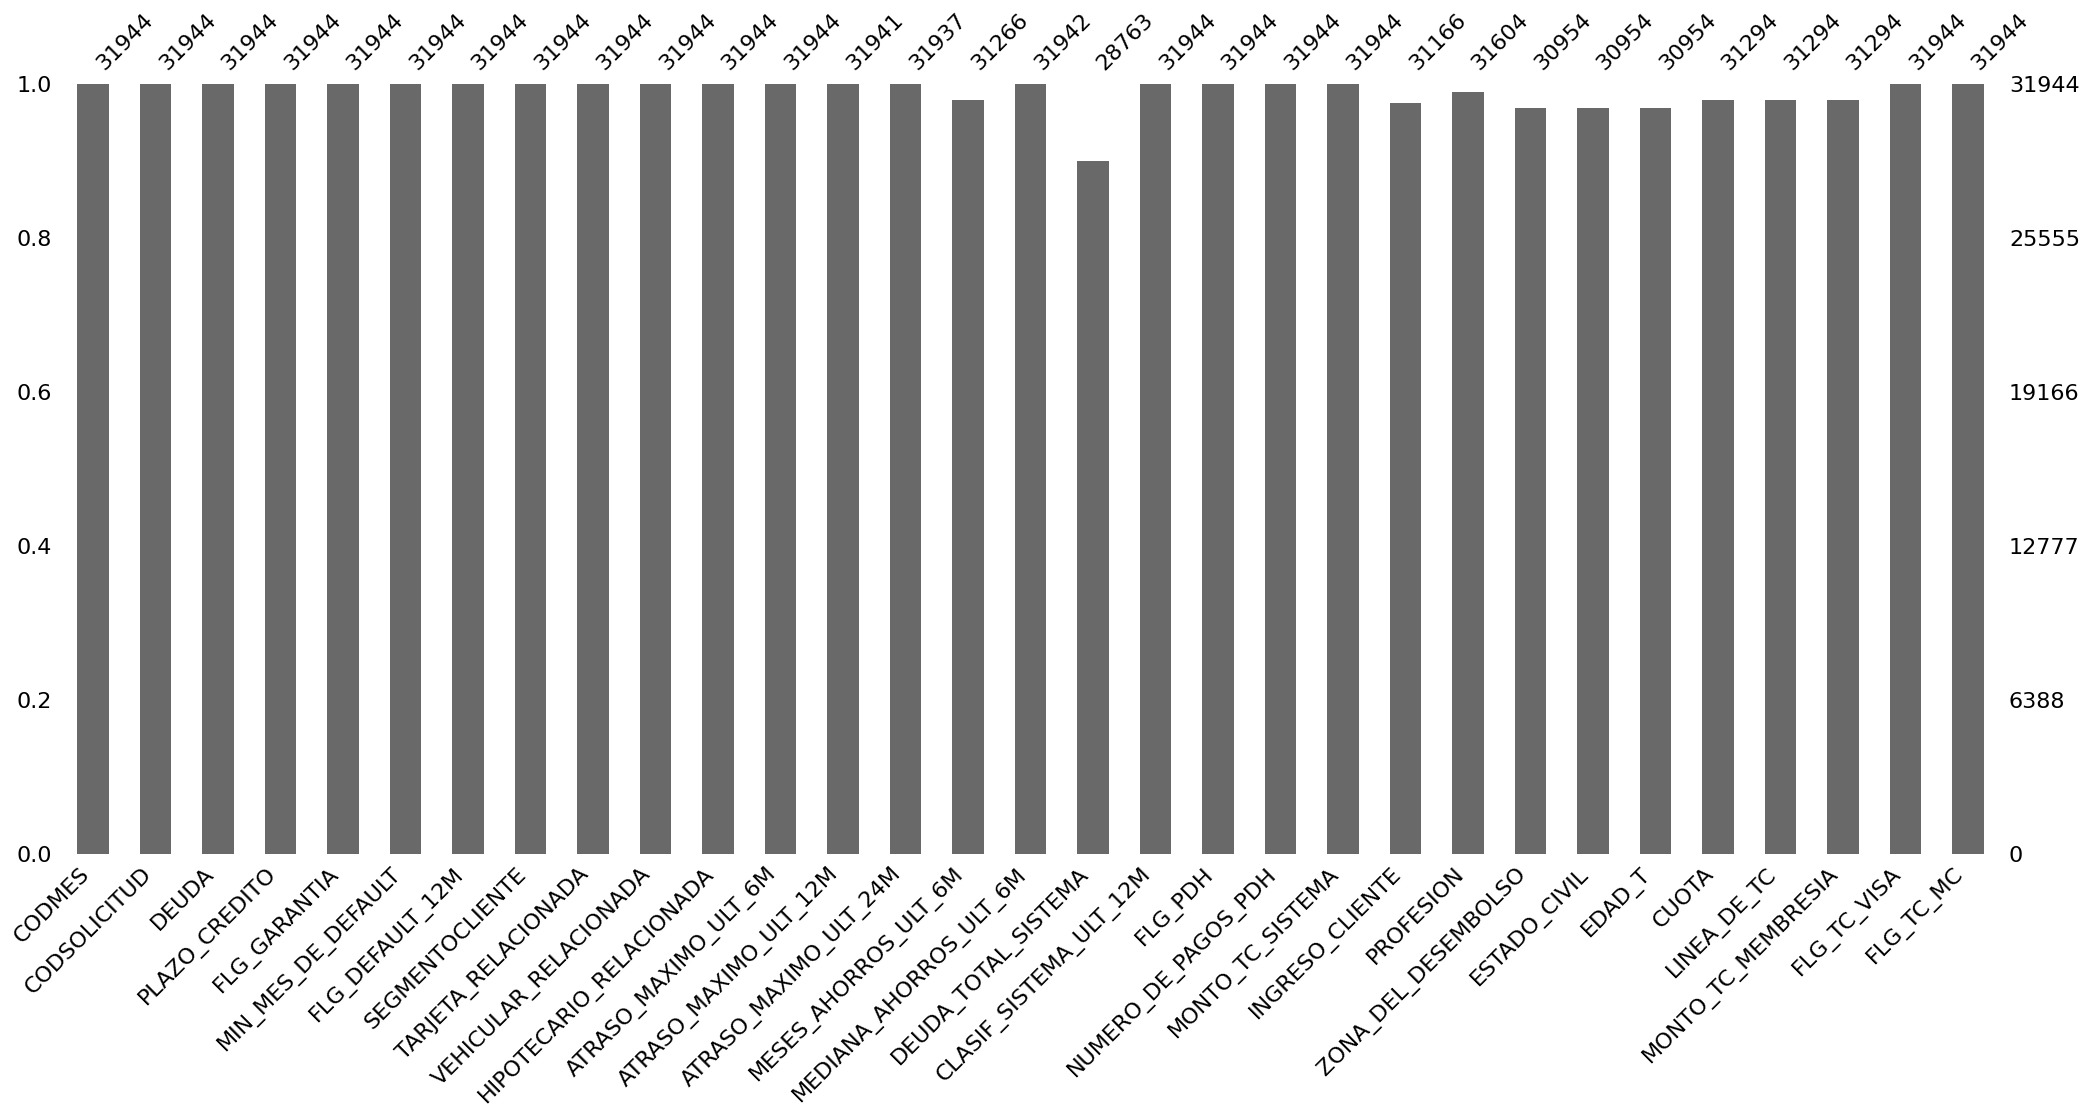

In [ ]:
msno.bar(df_clase)

<Axes: >

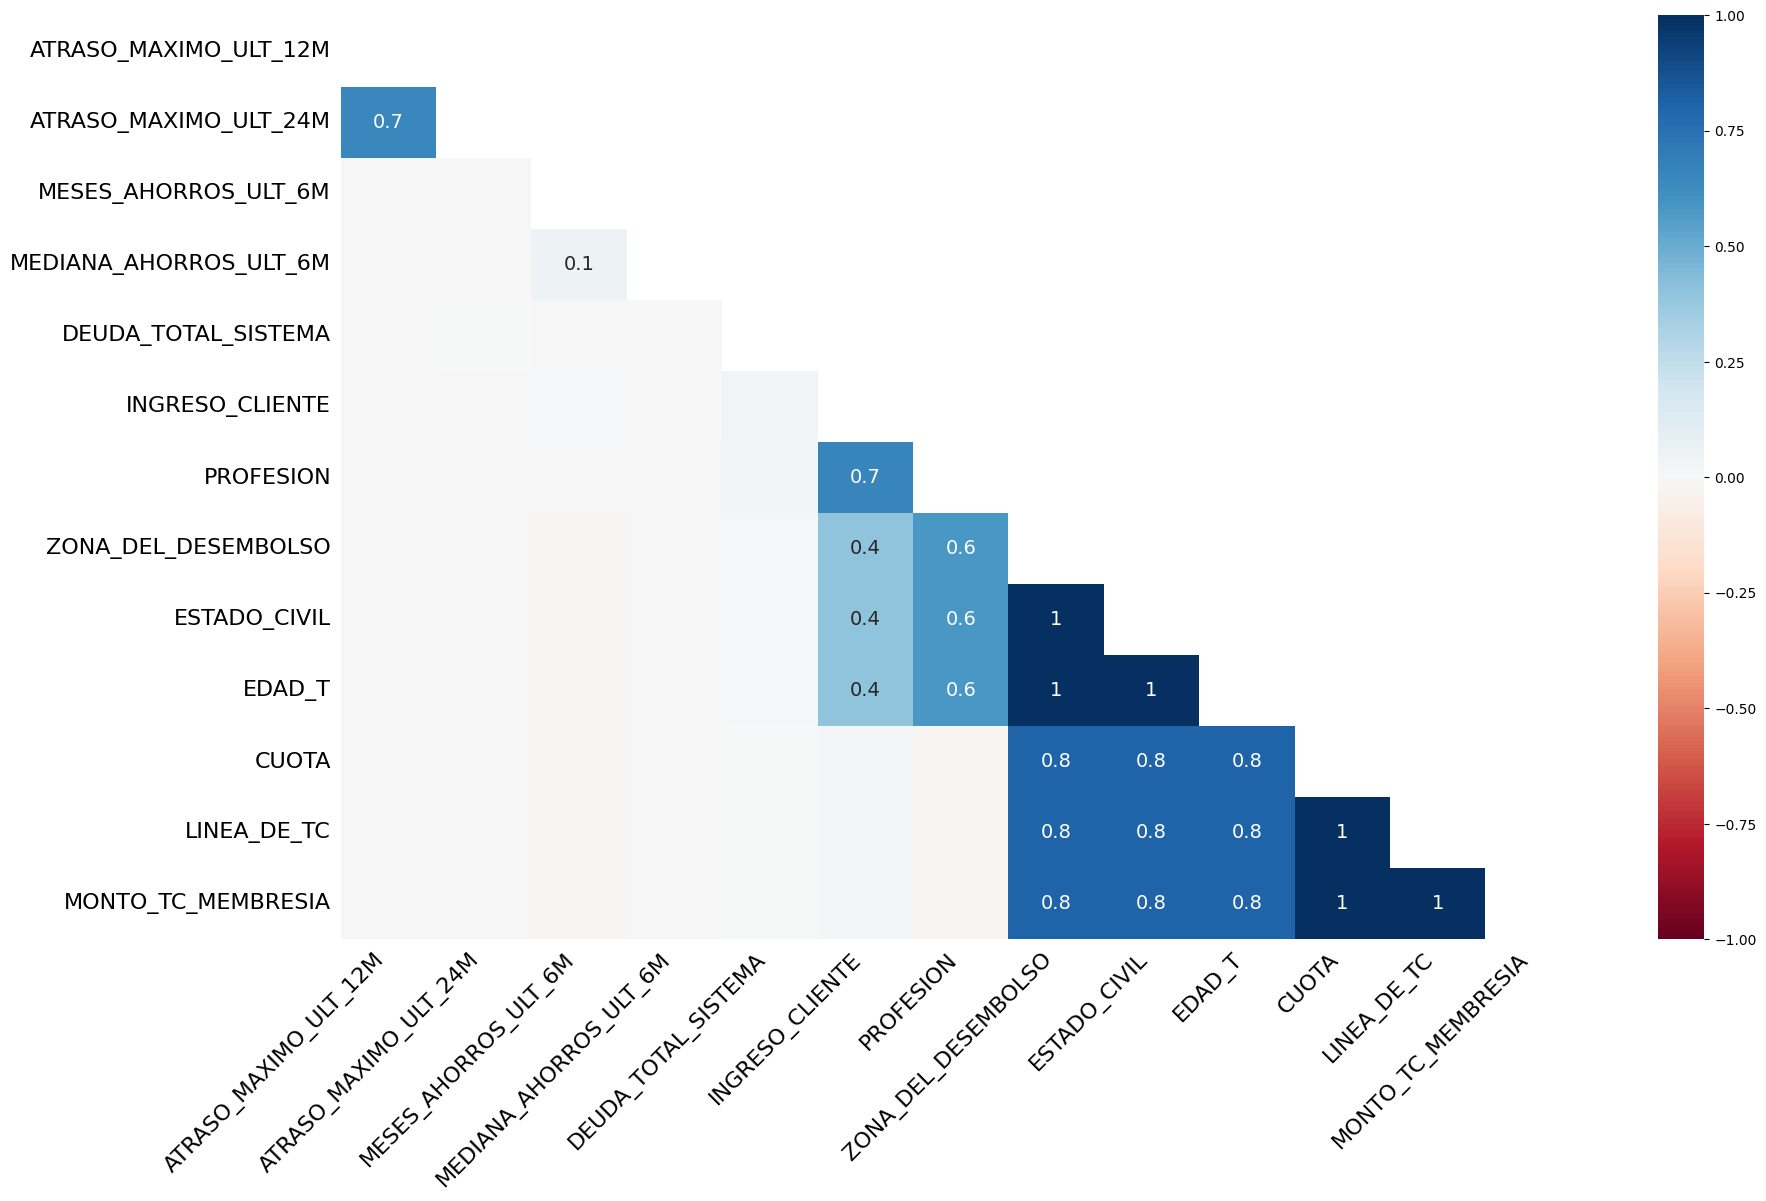

In [ ]:
msno.heatmap(df_clase)

In [ ]:
def valores_inexistentes_col(df):
  n_records = len(df)
  for columna in df:
    print("{} | {} | {}".format(
        df[columna].name, round((len(df[df[columna].isnull()]) / (1.0*n_records))*100,2), df[columna].dtype
        ))

In [ ]:
valores_inexistentes_col(df_clase)

CODMES | 0.0 | object
CODSOLICITUD | 0.0 | object
DEUDA | 0.0 | float64
PLAZO_CREDITO | 0.0 | int64
FLG_GARANTIA | 0.0 | object
MIN_MES_DE_DEFAULT | 0.0 | object
FLG_DEFAULT_12M | 0.0 | int64
SEGMENTOCLIENTE | 0.0 | object
TARJETA_RELACIONADA | 0.0 | object
VEHICULAR_RELACIONADA | 0.0 | object
HIPOTECARIO_RELACIONADA | 0.0 | object
ATRASO_MAXIMO_ULT_6M | 0.0 | int64
ATRASO_MAXIMO_ULT_12M | 0.01 | float64
ATRASO_MAXIMO_ULT_24M | 0.02 | float64
MESES_AHORROS_ULT_6M | 2.12 | float64
MEDIANA_AHORROS_ULT_6M | 0.01 | float64
DEUDA_TOTAL_SISTEMA | 9.96 | float64
CLASIF_SISTEMA_ULT_12M | 0.0 | object
FLG_PDH | 0.0 | object
NUMERO_DE_PAGOS_PDH | 0.0 | int64
MONTO_TC_SISTEMA | 0.0 | float64
INGRESO_CLIENTE | 2.44 | float64
PROFESION | 1.06 | object
ZONA_DEL_DESEMBOLSO | 3.1 | object
ESTADO_CIVIL | 3.1 | object
EDAD_T | 3.1 | float64
CUOTA | 2.03 | float64
LINEA_DE_TC | 2.03 | float64
MONTO_TC_MEMBRESIA | 2.03 | float64
FLG_TC_VISA | 0.0 | object
FLG_TC_MC | 0.0 | object


In [ ]:
#df_clase["ATRASO_MAXIMO_ULT_12M"] = df_clase["ATRASO_MAXIMO_ULT_12M"].fillna(df_clase["ATRASO_MAXIMO_ULT_12M"].mean())
#df_clase["DEUDA_TOTAL_SISTEMA"] = df_clase["DEUDA_TOTAL_SISTEMA"].fillna(0)

### Valores Atípicos (Outliers)

In [ ]:
from scipy import stats
import numpy as np

def outliers_col(df):
  for columna in df:
    if df[columna].dtype != np.object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers = len(df[(df[columna]<lim_inf) | (df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers,
          df[columna].dtype
          ))

In [ ]:
outliers_col(df_clase)

DEUDA | 2126 | float64
PLAZO_CREDITO | 0 | int64
FLG_DEFAULT_12M | 2024 | int64
ATRASO_MAXIMO_ULT_6M | 2005 | int64
ATRASO_MAXIMO_ULT_12M | 4154 | float64
ATRASO_MAXIMO_ULT_24M | 6634 | float64
MESES_AHORROS_ULT_6M | 4635 | float64
MEDIANA_AHORROS_ULT_6M | 3318 | float64
DEUDA_TOTAL_SISTEMA | 1880 | float64
NUMERO_DE_PAGOS_PDH | 0 | int64
MONTO_TC_SISTEMA | 4470 | float64
INGRESO_CLIENTE | 2512 | float64
EDAD_T | 350 | float64
CUOTA | 2867 | float64
LINEA_DE_TC | 1200 | float64
MONTO_TC_MEMBRESIA | 2015 | float64


<Axes: >

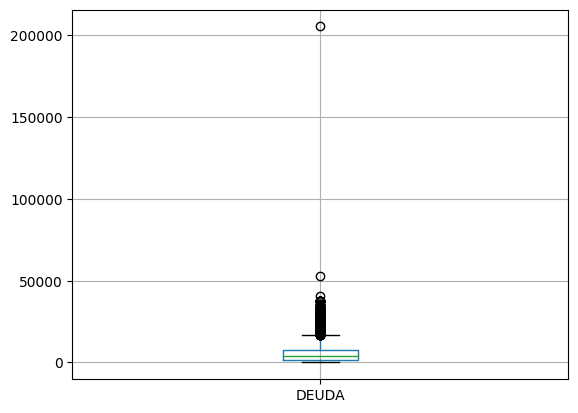

In [ ]:
df_clase.boxplot(column=['DEUDA'])

In [ ]:
df_clase['DEUDA'].describe()

count     31944.000000
mean       5769.284906
std        5848.504517
min           8.791365
25%        1602.717111
50%        3768.298333
75%        7786.406583
max      205483.523000
Name: DEUDA, dtype: float64

In [ ]:
df_clase['DEUDA'].quantile(np.arange(0,1,0.1))

0.0        8.791365
0.1      808.277500
0.2     1347.129167
0.3     1941.249724
0.4     2694.258333
0.5     3768.298333
0.6     5065.051667
0.7     6664.541667
0.8     9284.689425
0.9    14373.366500
Name: DEUDA, dtype: float64

In [ ]:
df_clase['DEUDA'].quantile(np.arange(0.9,1,0.01))

0.90    14373.366500
0.91    15195.155000
0.92    15994.900000
0.93    16634.583367
0.94    17893.882865
0.95    18859.808330
0.96    20327.426215
0.97    21815.736782
0.98    23325.895830
0.99    23574.760420
Name: DEUDA, dtype: float64

In [ ]:
#df_clase['DEUDA'] = df_clase.where(df_clase['DEUDA']<18859.808330, 18859.808330)["DEUDA"]

#### 3.2 Análisis Bivariado

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase['CLASIF_SISTEMA_ULT_12M'].value_counts()

0.0    23640
1.0     3978
nan     1667
2.0     1100
4.0      996
3.0      563
Name: CLASIF_SISTEMA_ULT_12M, dtype: int64

In [ ]:
def bivariado_plot_cat(df, columna, default):
  aux = df[[default,columna]]
  aux = aux.groupby(columna)[default].mean().reset_index()
  sns.lineplot(x = columna, y = default, data = aux)
  plt.xlabel(columna)
  plt.show()

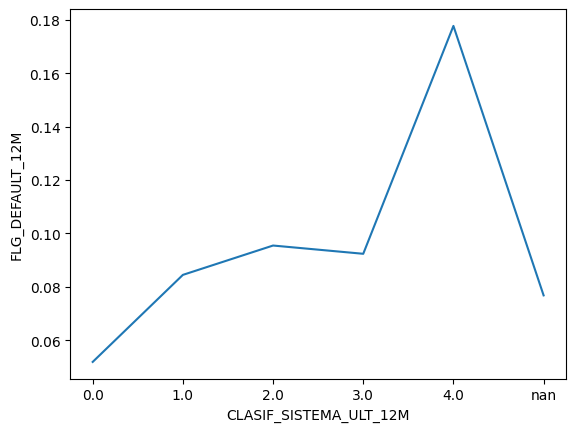

In [ ]:
bivariado_plot_cat(df_clase,'CLASIF_SISTEMA_ULT_12M','FLG_DEFAULT_12M')

In [ ]:
T=df_clase[['CLASIF_SISTEMA_ULT_12M','FLG_DEFAULT_12M']].groupby(['CLASIF_SISTEMA_ULT_12M'], as_index=False).agg(['count','sum','mean'])
T.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
T

FLG_DEFAULT_12M                
                                 total  bads  bad_rate
CLASIF_SISTEMA_ULT_12M                                
0.0                              23640  1226  0.051861
1.0                               3978   336  0.084465
2.0                               1100   105  0.095455
3.0                                563    52  0.092362
4.0                                996   177  0.177711
nan                               1667   128  0.076785

In [ ]:
def bivariado_plot_num(df, columna, default, bins):
  aux = df[[default, columna]]
  aux["Var"] = pd.qcut(aux[columna],bins, labels=False)
  aux = aux.groupby("Var")[default].mean().reset_index()
  sns.lineplot(x = 'Var', y = default, data = aux, markers=True, dashes=False)
  plt.xlabel(columna)
  plt.show()

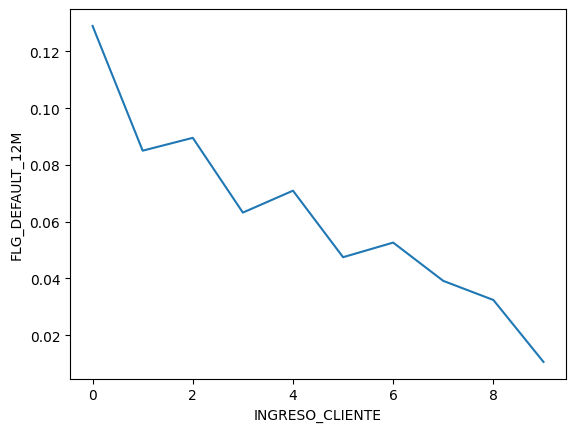

In [ ]:
bivariado_plot_num(df_clase,'INGRESO_CLIENTE','FLG_DEFAULT_12M',10)

In [ ]:
A=pd.qcut(x=df_clase['INGRESO_CLIENTE'],q=10,labels=False)
B=df_clase[['FLG_DEFAULT_12M', 'INGRESO_CLIENTE']].groupby(A)['FLG_DEFAULT_12M'].agg(['count','sum','mean']).reset_index()
B.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
B

,INGRESO_CLIENTE,total,bads,bad_rate
0,0.0,3117,402,0.128970
1,1.0,3117,265,0.085018
2,2.0,3116,279,0.089538
3,3.0,3117,197,0.063202
4,4.0,3116,221,0.070924
5,5.0,3117,148,0.047482
6,6.0,3116,164,0.052632
7,7.0,3117,122,0.039140
8,8.0,3116,101,0.032413
9,9.0,3117,33,0.010587


### 3.3 Analizaremos las Interacciones entre variables

### Correlaciones

In [ ]:
df_clase.corr()

,DEUDA,PLAZO_CREDITO,FLG_DEFAULT_12M,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
DEUDA,1.000000,0.563483,0.016840,0.011512,-0.003455,-0.003098,0.133302,0.284829,0.347254,-0.109651,0.388112,0.452504,0.147920,0.473427,0.266316,0.326340
PLAZO_CREDITO,0.563483,1.000000,0.068333,0.022457,-0.003804,0.000413,0.048946,0.149256,0.225000,-0.034037,0.239272,0.244348,0.045946,0.321024,0.124693,0.151804
FLG_DEFAULT_12M,0.016840,0.068333,1.000000,0.010726,0.015422,0.013493,-0.110649,-0.098969,-0.025431,-0.107763,-0.006700,-0.101125,-0.065376,-0.017087,-0.060135,-0.049768
ATRASO_MAXIMO_ULT_6M,0.011512,0.022457,0.010726,1.000000,0.083028,0.078199,-0.040203,-0.004495,0.030198,-0.017221,0.014766,0.004088,0.010250,0.027450,-0.011218,0.001030
ATRASO_MAXIMO_ULT_12M,-0.003455,-0.003804,0.015422,0.083028,1.000000,0.822126,-0.023398,-0.001436,0.000114,-0.002735,-0.002195,-0.006061,-0.001312,-0.000237,-0.004734,-0.002998
ATRASO_MAXIMO_ULT_24M,-0.003098,0.000413,0.013493,0.078199,0.822126,1.000000,-0.024684,-0.007211,-0.002469,-0.009444,-0.003688,-0.010092,0.006465,-0.001355,-0.008129,-0.008661
MESES_AHORROS_ULT_6M,0.133302,0.048946,-0.110649,-0.040203,-0.023398,-0.024684,1.000000,0.227005,0.074298,0.072479,0.045134,0.284736,-0.011234,0.085142,0.151250,0.141160
MEDIANA_AHORROS_ULT_6M,0.284829,0.149256,-0.098969,-0.004495,-0.001436,-0.007211,0.227005,1.000000,0.205670,0.104674,0.126633,0.545248,0.191158,0.210583,0.272078,0.262680
DEUDA_TOTAL_SISTEMA,0.347254,0.225000,-0.025431,0.030198,0.000114,-0.002469,0.074298,0.205670,1.000000,-0.042258,0.475576,0.558708,0.129350,0.804898,0.315826,0.344950
NUMERO_DE_PAGOS_PDH,-0.109651,-0.034037,-0.107763,-0.017221,-0.002735,-0.009444,0.072479,0.104674,-0.042258,1.000000,-0.071905,0.033523,0.012417,-0.059385,-0.004688,-0.053763


# 4. Feature Engineering

#### 4.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [ ]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pip install feature_engine

In [ ]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [ ]:
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06337209302325582

In [ ]:
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.0633347245409015

In [ ]:
X_train.isnull().mean().where(X_train.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
DEUDA                           NaN
PLAZO_CREDITO                   NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
ATRASO_MAXIMO_ULT_6M            NaN
ATRASO_MAXIMO_ULT_12M      0.000045
ATRASO_MAXIMO_ULT_24M      0.000179
MESES_AHORROS_ULT_6M       0.020081
MEDIANA_AHORROS_ULT_6M     0.000089
DEUDA_TOTAL_SISTEMA        0.100134
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
NUMERO_DE_PAGOS_PDH             NaN
MONTO_TC_SISTEMA                NaN
INGRESO_CLIENTE            0.024240
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.030367
CUOTA                      0.020081
LINEA_DE_TC                0.020081
MONTO_TC_MEMBRESIA         0

### Empecemos con las variable numéricas

In [ ]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                          NaN
PLAZO_CREDITO                  NaN
ATRASO_MAXIMO_ULT_6M           NaN
ATRASO_MAXIMO_ULT_12M     0.000045
ATRASO_MAXIMO_ULT_24M     0.000179
MESES_AHORROS_ULT_6M      0.020081
MEDIANA_AHORROS_ULT_6M    0.000089
DEUDA_TOTAL_SISTEMA       0.100134
NUMERO_DE_PAGOS_PDH            NaN
MONTO_TC_SISTEMA               NaN
INGRESO_CLIENTE           0.024240
EDAD_T                    0.030367
CUOTA                     0.020081
LINEA_DE_TC               0.020081
MONTO_TC_MEMBRESIA        0.020081
dtype: float64

In [ ]:
# Aplicaremos el imputador de missing
imputer_1 = MeanMedianImputer(
    imputation_method='median',
    variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'],
)

imputer_1.fit(X_train)

MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T', 'INGRESO_CLIENTE'])

In [ ]:
# dejamos 'CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M',
#         'ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA'

In [ ]:
imputer_1.variables_

['LINEA_DE_TC', 'EDAD_T', 'INGRESO_CLIENTE']

In [ ]:
imputer_1.imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [ ]:
X_train[imputer_1.variables_].median()

LINEA_DE_TC        9609.000000
EDAD_T               35.000000
INGRESO_CLIENTE    2271.177355
dtype: float64

In [ ]:
X_train_t = imputer_1.transform(X_train)
X_test_t = imputer_1.transform(X_test)

In [ ]:
X_train_t[imputer_1.variables_].isnull().mean()

LINEA_DE_TC        0.0
EDAD_T             0.0
INGRESO_CLIENTE    0.0
dtype: float64

In [ ]:
X_test_t[imputer_1.variables_].isnull().mean()

LINEA_DE_TC        0.0
EDAD_T             0.0
INGRESO_CLIENTE    0.0
dtype: float64

In [ ]:
from feature_engine.imputation import ArbitraryNumberImputer

In [ ]:
imputer_2 = ArbitraryNumberImputer(
    arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']
)

imputer_2.fit(X_train)

#imputer_2 = ArbitraryNumberImputer(
#    imputer_dict={
#        'CUOTA': -999,
#        'DEUDA_TOTAL_SISTEMA': -999,
#        'MEDIANA_AHORROS_ULT_6M': -1,
#        'MESES_AHORROS_ULT_6M': -1,
#        'ATRASO_MAXIMO_ULT_24M': 0,
#        'ATRASO_MAXIMO_ULT_12M': 0,
#        'MONTO_TC_MEMBRESIA': 0
#    }
#)
#
#imputer_2.fit(X_train)


ArbitraryNumberImputer(arbitrary_number=0,
                       variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA',
                                  'MEDIANA_AHORROS_ULT_6M',
                                  'MESES_AHORROS_ULT_6M',
                                  'ATRASO_MAXIMO_ULT_24M',
                                  'ATRASO_MAXIMO_ULT_12M',
                                  'MONTO_TC_MEMBRESIA'])

In [ ]:
imputer_2.variables_

['CUOTA',
 'DEUDA_TOTAL_SISTEMA',
 'MEDIANA_AHORROS_ULT_6M',
 'MESES_AHORROS_ULT_6M',
 'ATRASO_MAXIMO_ULT_24M',
 'ATRASO_MAXIMO_ULT_12M',
 'MONTO_TC_MEMBRESIA']

In [ ]:
imputer_2.arbitrary_number

0

In [ ]:
X_train_t = imputer_2.transform(X_train_t)
X_test_t = imputer_2.transform(X_test_t)

In [ ]:
X_train_t[imputer_2.variables_].isnull().mean()

CUOTA                     0.0
DEUDA_TOTAL_SISTEMA       0.0
MEDIANA_AHORROS_ULT_6M    0.0
MESES_AHORROS_ULT_6M      0.0
ATRASO_MAXIMO_ULT_24M     0.0
ATRASO_MAXIMO_ULT_12M     0.0
MONTO_TC_MEMBRESIA        0.0
dtype: float64

In [ ]:
X_test_t[imputer_2.variables_].isnull().mean()

CUOTA                     0.0
DEUDA_TOTAL_SISTEMA       0.0
MEDIANA_AHORROS_ULT_6M    0.0
MESES_AHORROS_ULT_6M      0.0
ATRASO_MAXIMO_ULT_24M     0.0
ATRASO_MAXIMO_ULT_12M     0.0
MONTO_TC_MEMBRESIA        0.0
dtype: float64

In [ ]:
#X_train.hist(bins = 50, figsize=(20,15))
#plt.show()

In [ ]:
var_num = X_train_t.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                    NaN
PLAZO_CREDITO            NaN
ATRASO_MAXIMO_ULT_6M     NaN
ATRASO_MAXIMO_ULT_12M    NaN
ATRASO_MAXIMO_ULT_24M    NaN
MESES_AHORROS_ULT_6M     NaN
MEDIANA_AHORROS_ULT_6M   NaN
DEUDA_TOTAL_SISTEMA      NaN
NUMERO_DE_PAGOS_PDH      NaN
MONTO_TC_SISTEMA         NaN
INGRESO_CLIENTE          NaN
EDAD_T                   NaN
CUOTA                    NaN
LINEA_DE_TC              NaN
MONTO_TC_MEMBRESIA       NaN
dtype: float64

In [ ]:
# Usemos Pipelines para concatenar diferentes métodos de imputación
pipe_1 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(
                imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']
            ),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(
                arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']
        ),
        ),
    ]
)

In [ ]:
pipe_1.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA']))])

In [ ]:
pipe_1.named_steps["median_imputer"].imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [ ]:
pipe_1.named_steps["arbitrary_imputer"].imputer_dict_

{'CUOTA': 0,
 'DEUDA_TOTAL_SISTEMA': 0,
 'MEDIANA_AHORROS_ULT_6M': 0,
 'MESES_AHORROS_ULT_6M': 0,
 'ATRASO_MAXIMO_ULT_24M': 0,
 'ATRASO_MAXIMO_ULT_12M': 0,
 'MONTO_TC_MEMBRESIA': 0}

In [ ]:
X_train_t = pipe_1.transform(X_train)
X_test_t = pipe_1.transform(X_test)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.000000
CODSOLICITUD               0.000000
DEUDA                      0.000000
PLAZO_CREDITO              0.000000
FLG_GARANTIA               0.000000
MIN_MES_DE_DEFAULT         0.000000
SEGMENTOCLIENTE            0.000000
TARJETA_RELACIONADA        0.000000
VEHICULAR_RELACIONADA      0.000000
HIPOTECARIO_RELACIONADA    0.000000
ATRASO_MAXIMO_ULT_6M       0.000000
ATRASO_MAXIMO_ULT_12M      0.000000
ATRASO_MAXIMO_ULT_24M      0.000000
MESES_AHORROS_ULT_6M       0.000000
MEDIANA_AHORROS_ULT_6M     0.000000
DEUDA_TOTAL_SISTEMA        0.000000
CLASIF_SISTEMA_ULT_12M     0.000000
FLG_PDH                    0.000000
NUMERO_DE_PAGOS_PDH        0.000000
MONTO_TC_SISTEMA           0.000000
INGRESO_CLIENTE            0.000000
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.000000
CUOTA                      0.000000
LINEA_DE_TC                0.000000
MONTO_TC_MEMBRESIA         0

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.000000
CODSOLICITUD               0.000000
DEUDA                      0.000000
PLAZO_CREDITO              0.000000
FLG_GARANTIA               0.000000
MIN_MES_DE_DEFAULT         0.000000
SEGMENTOCLIENTE            0.000000
TARJETA_RELACIONADA        0.000000
VEHICULAR_RELACIONADA      0.000000
HIPOTECARIO_RELACIONADA    0.000000
ATRASO_MAXIMO_ULT_6M       0.000000
ATRASO_MAXIMO_ULT_12M      0.000000
ATRASO_MAXIMO_ULT_24M      0.000000
MESES_AHORROS_ULT_6M       0.000000
MEDIANA_AHORROS_ULT_6M     0.000000
DEUDA_TOTAL_SISTEMA        0.000000
CLASIF_SISTEMA_ULT_12M     0.000000
FLG_PDH                    0.000000
NUMERO_DE_PAGOS_PDH        0.000000
MONTO_TC_SISTEMA           0.000000
INGRESO_CLIENTE            0.000000
PROFESION                  0.011477
ZONA_DEL_DESEMBOLSO        0.032450
ESTADO_CIVIL               0.032450
EDAD_T                     0.000000
CUOTA                      0.000000
LINEA_DE_TC                0.000000
MONTO_TC_MEMBRESIA         0

### Continuemos con las variables categóricas

In [ ]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.isnull().mean().where(var_cat.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
FLG_TC_VISA                     NaN
FLG_TC_MC                       NaN
dtype: float64

In [ ]:
from feature_engine.imputation import CategoricalImputer

In [ ]:
imputer_3 = CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
# si no se especifica el método de imputación, le imputará el valor "Missing"
imputer_3.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['PROFESION', 'ZONA_DEL_DESEMBOLSO',
                              'ESTADO_CIVIL'])

In [ ]:
imputer_3.variables_

['PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL']

In [ ]:
imputer_3.imputer_dict_

{'PROFESION': 'TECNICO',
 'ZONA_DEL_DESEMBOLSO': 'AREQUIPA',
 'ESTADO_CIVIL': 'SOL'}

In [ ]:
X_train_t = imputer_3.transform(X_train_t)
X_test_t = imputer_3.transform(X_test_t)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación en uno solo
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
    ]
)

In [ ]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL']))])

In [ ]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

### En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [ ]:
cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [ ]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [ ]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [ ]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5


In [ ]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
# Analicemos la variable Zona
unique_to_train_set = [x for x in X_train_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_test_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_train_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


### Podemos decir que las demás variables categóricas efectivamente no presentan ningún problema en train o test?

#### Entonces debemos de revisar cardinalidad y valores raros

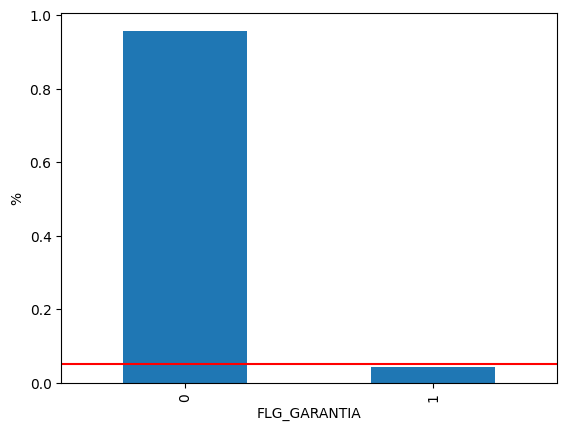

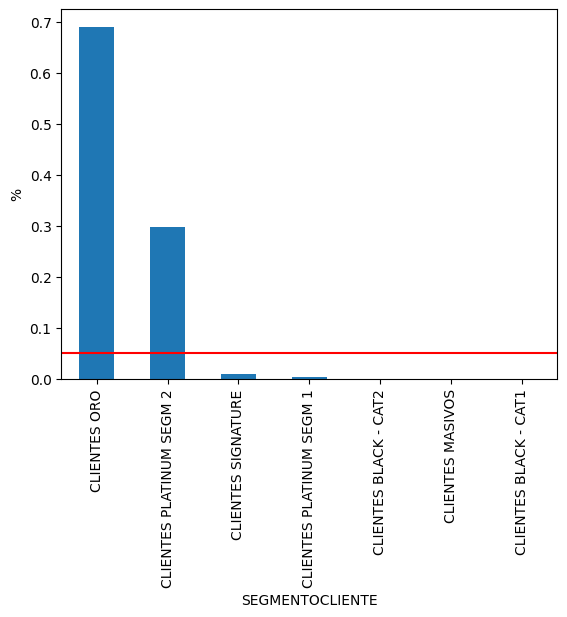

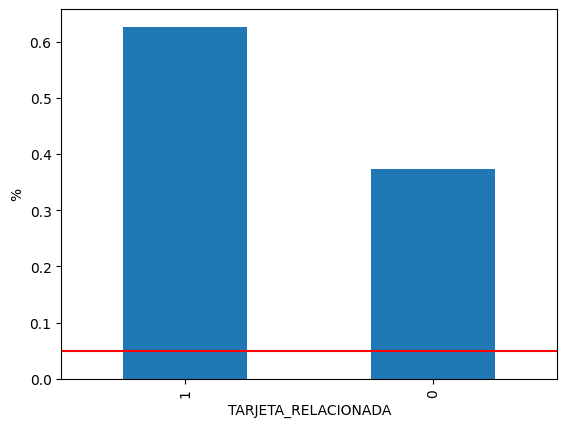

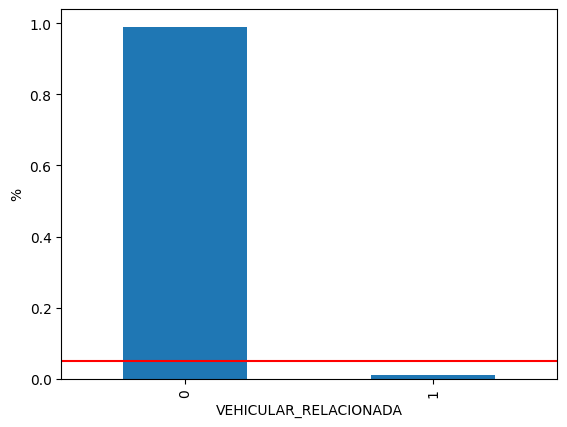

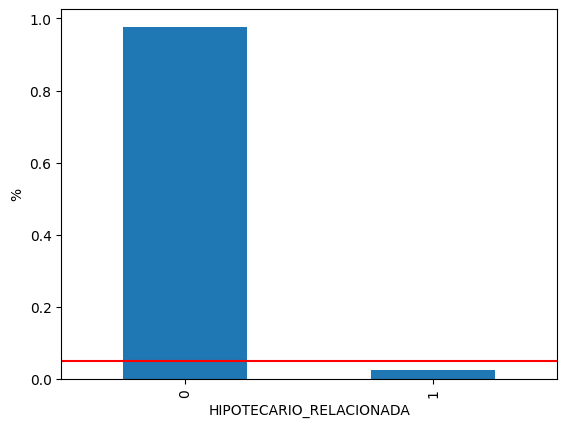

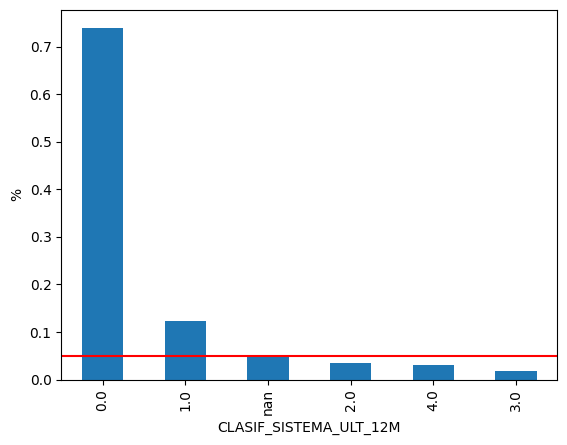

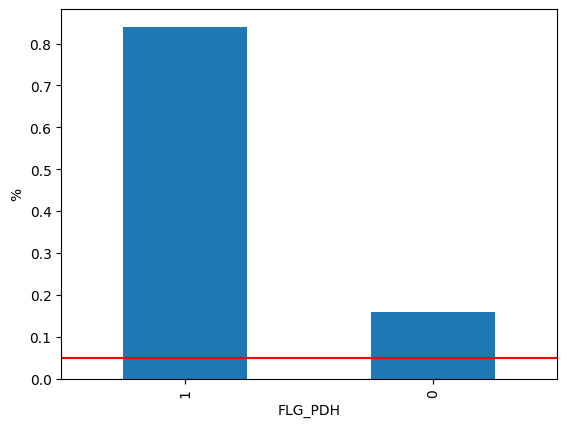

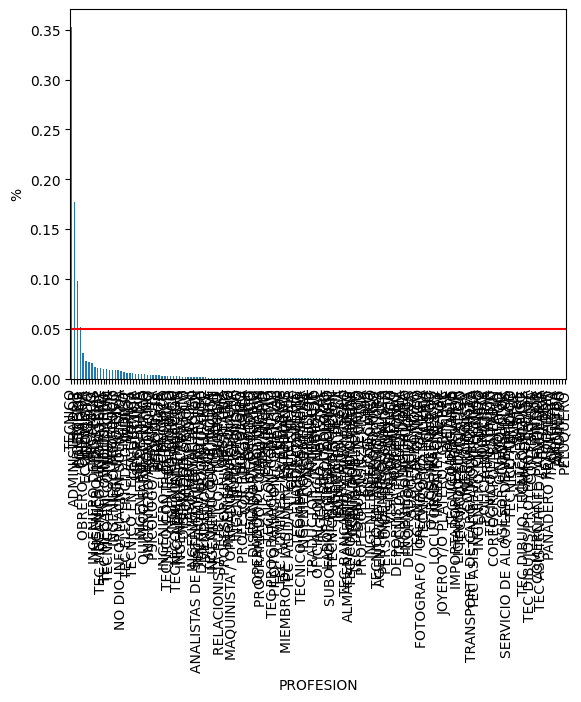

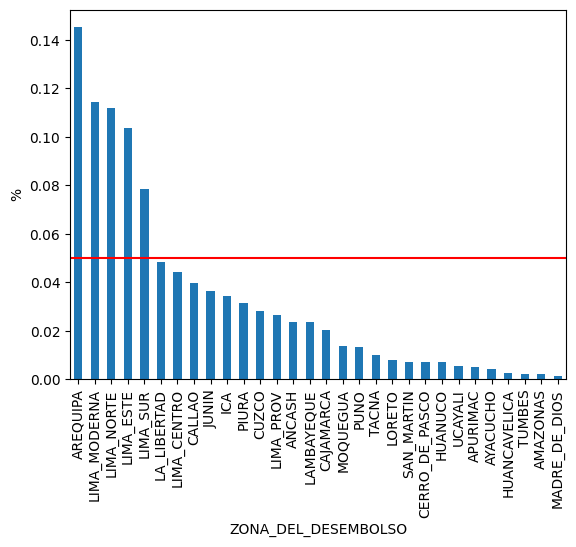

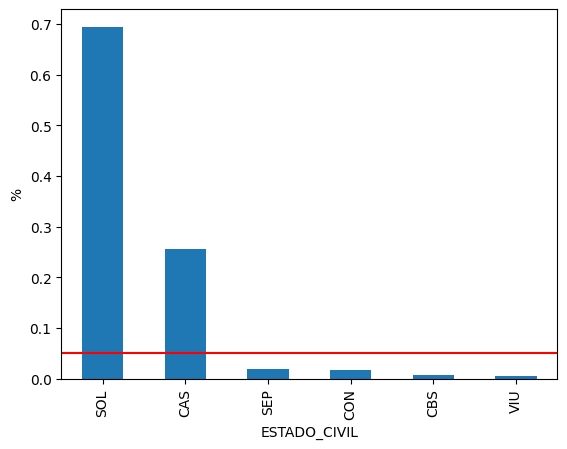

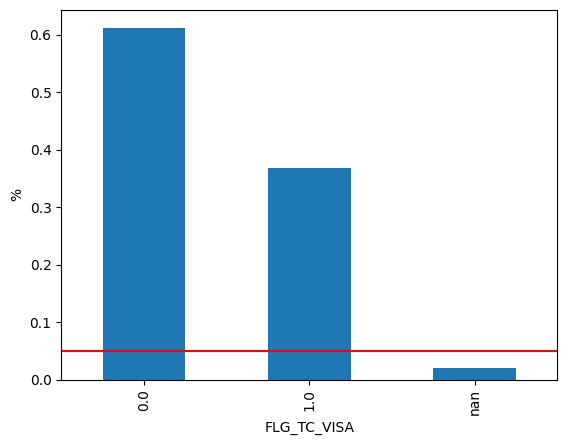

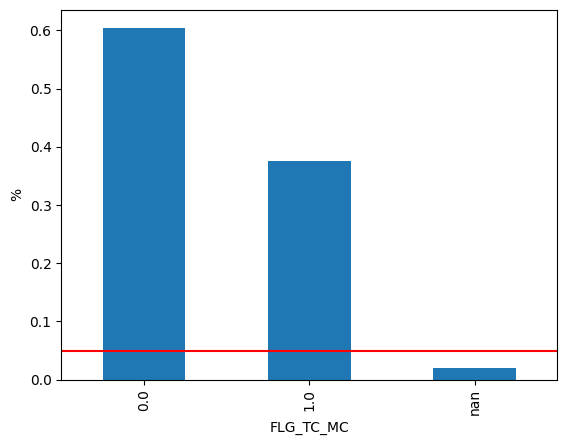

In [ ]:
total = len(X_train_t)
for col in cat_cols:
    temp_df = pd.Series(X_train_t[col].value_counts() / total)
    fig = temp_df.sort_values(ascending=False).plot.bar() #figsize=(10,5)
    fig.set_xlabel(col)
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('%')
    plt.show()

In [ ]:
tot_train_t=pd.concat([X_train_t, y_train], axis=1)
tot_train_t.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,201403,1518,17512.679170,60,0,nan,CLIENTES PLATINUM SEGM 2,1,0,0,...,ADMINISTRADOR,CALLAO,SOL,34.0,57.866550,12592.0,170.0,0.0,0.0,0
27337,201503,27338,2932.398333,48,1,nan,CLIENTES PLATINUM SEGM 2,0,0,1,...,CONTADOR,SAN_MARTIN,SOL,28.0,1808.308516,15569.0,100.0,1.0,1.0,0
573,201309,574,4790.418259,48,0,nan,CLIENTES ORO,0,0,0,...,MIEMBRO DE LAS FUERZAS ARMADAS,LIMA_NORTE,SEP,41.0,793.981440,6211.0,76.0,1.0,1.0,0
31740,201505,31741,824.938742,48,0,nan,CLIENTES ORO,0,0,0,...,TECNICO,AREQUIPA,CAS,45.0,890.709120,20716.0,78.0,1.0,1.0,0
25079,201504,25080,2665.816667,24,0,nan,CLIENTES PLATINUM SEGM 2,1,0,1,...,INGENIERO,LIMA_ESTE,CAS,48.0,9996.581553,14000.0,400.0,0.0,0.0,0


In [ ]:
def calculate_mean_target_per_category(df, var):
    total = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total).reset_index()
    temp_df.columns = [var, '%']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['FLG_DEFAULT_12M'].mean().reset_index(),
                            on=var,
                            how='left')
    return temp_df

In [ ]:
temp_df = calculate_mean_target_per_category(tot_train_t, 'PROFESION')
temp_df

,PROFESION,%,FLG_DEFAULT_12M
0,TECNICO,0.352773,0.079741
1,ADMINISTRADOR,0.176878,0.065740
2,INGENIERO,0.098479,0.039510
3,CONTADOR,0.051476,0.041703
4,OBRERO / OPERADOR,0.026073,0.087479
...,...,...,...
165,GINECOLOGO,0.000045,0.000000
166,NOTARIO,0.000045,0.000000
167,COREOGRAFO / BAILARIN,0.000045,0.000000
168,TECNICO EN SONIDO,0.000045,0.000000


In [ ]:
def plot_categories(df, var):
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)
    ax2 = ax.twinx()
    ax.bar(df.index, df["%"], color='lightgrey')
    ax2.plot(df.index, df["FLG_DEFAULT_12M"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('Freq %')
    ax.set_xlabel(var)
    ax2.set_ylabel('Bad Rate')
    plt.show()

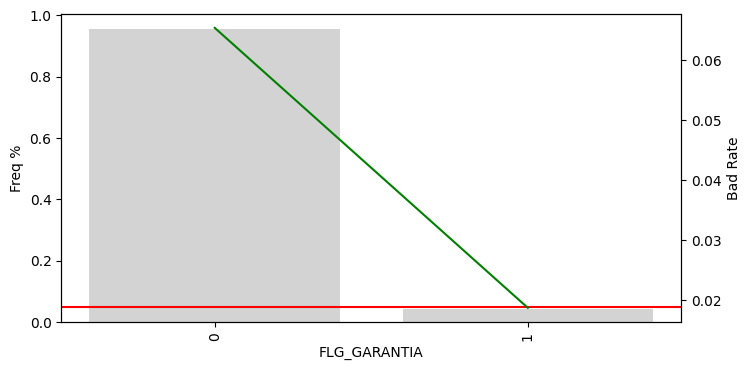

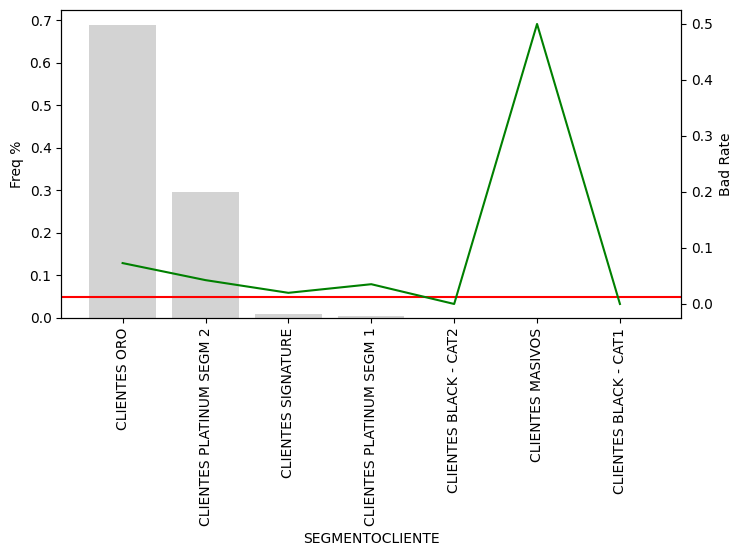

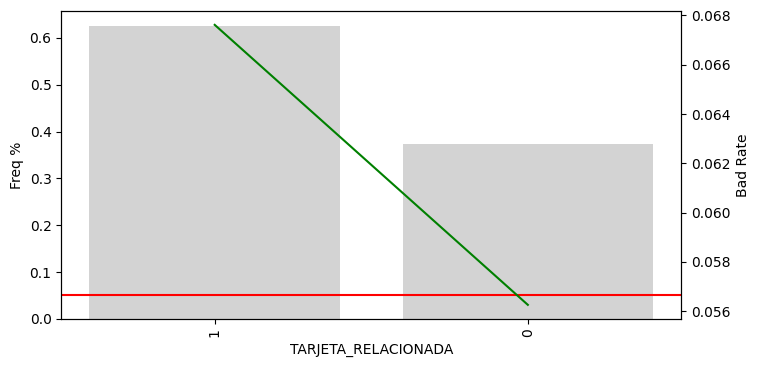

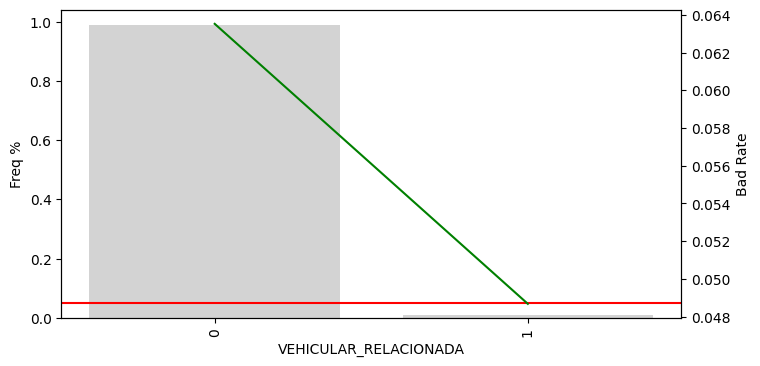

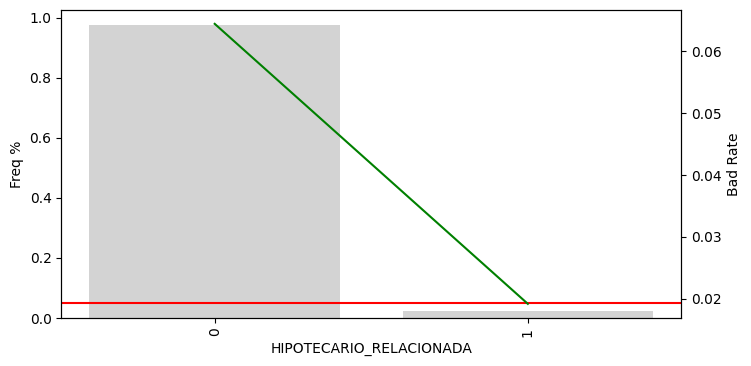

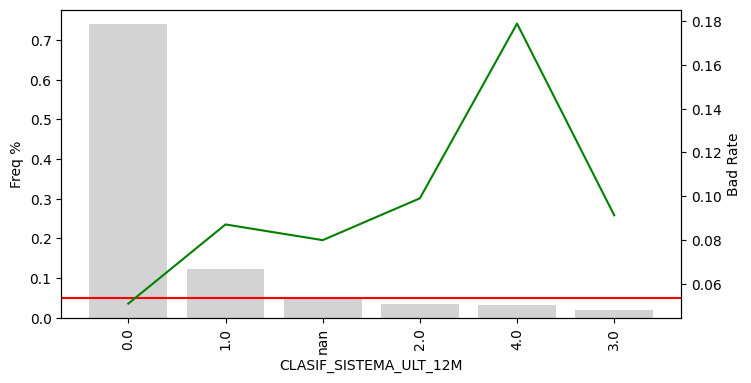

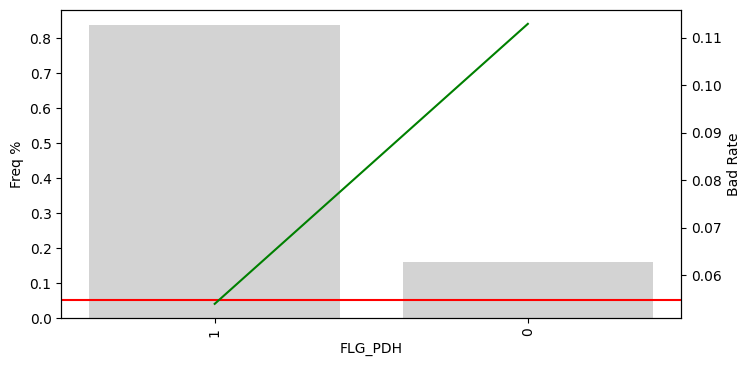

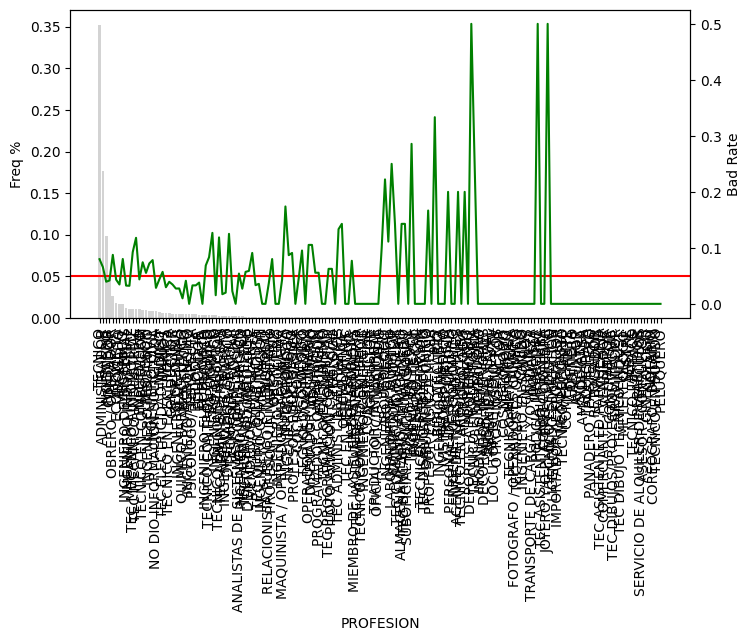

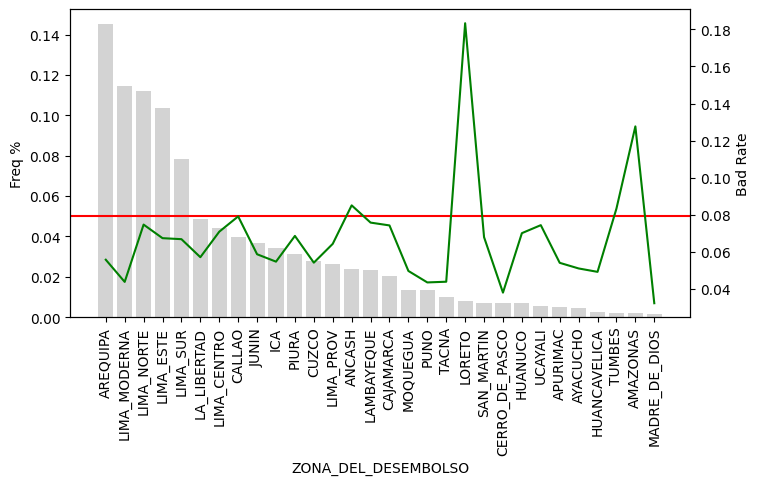

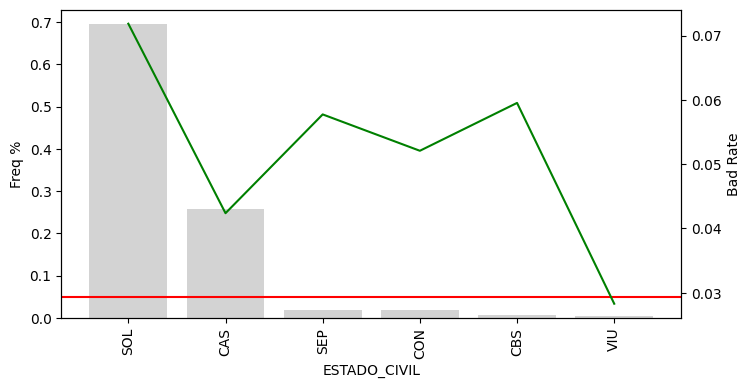

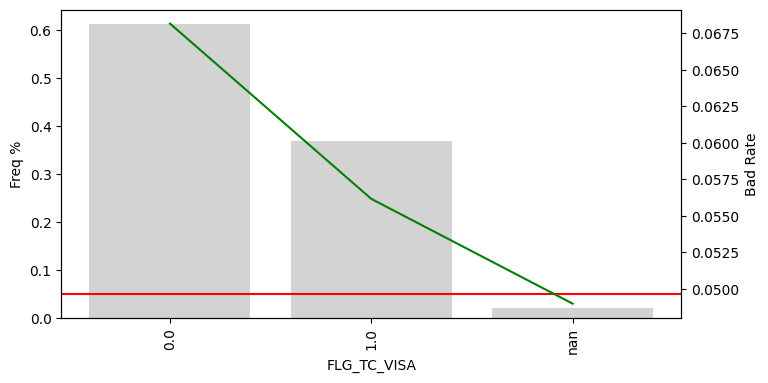

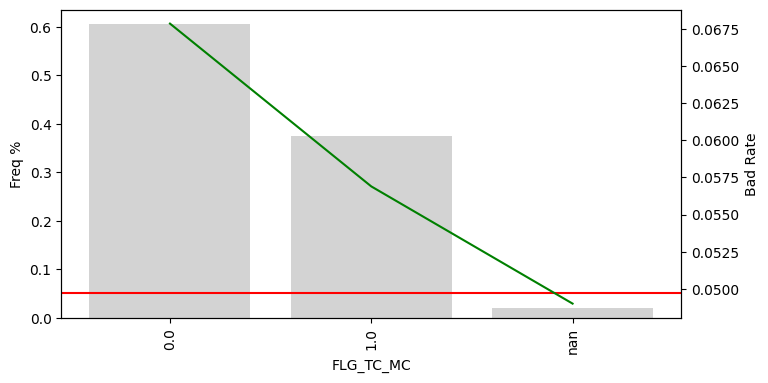

In [ ]:
for col in cat_cols:
  temp_df = calculate_mean_target_per_category(tot_train_t, col)
  plot_categories(temp_df, col)

In [ ]:
from feature_engine.encoding import RareLabelEncoder
rare_encoder = RareLabelEncoder(
    tol=0.01,
    n_categories=5,
    variables=["PROFESION","SEGMENTOCLIENTE",],
)

In [ ]:
rare_encoder.fit(X_train_t)

RareLabelEncoder(n_categories=5, tol=0.01,
                 variables=['PROFESION', 'SEGMENTOCLIENTE'])

In [ ]:
rare_encoder.variables_

['PROFESION', 'SEGMENTOCLIENTE']

In [ ]:
rare_encoder.encoder_dict_

{'PROFESION': ['TECNICO',
  'ADMINISTRADOR',
  'INGENIERO',
  'CONTADOR',
  'OBRERO / OPERADOR',
  'ECONOMISTA',
  'ABOGADO',
  'MECANICO',
  'INGENIERO DE SISTEMAS',
  'INGENIERO INDUSTRIAL',
  'TEC MECANICO AUTOMOTRIZ',
  'TEC MECANICO INDUSTRIAL',
  'ENFERMERO'],
 'SEGMENTOCLIENTE': ['CLIENTES ORO', 'CLIENTES PLATINUM SEGM 2']}

In [ ]:
X_train_t = rare_encoder.transform(X_train_t)
X_test_t = rare_encoder.transform(X_test_t)

In [ ]:
X_train_t.PROFESION.value_counts()

TECNICO                    7888
Rare                       4230
ADMINISTRADOR              3955
INGENIERO                  2202
CONTADOR                   1151
OBRERO / OPERADOR           583
ECONOMISTA                  393
ABOGADO                     376
MECANICO                    362
INGENIERO DE SISTEMAS       276
INGENIERO INDUSTRIAL        248
TEC MECANICO AUTOMOTRIZ     238
ENFERMERO                   229
TEC MECANICO INDUSTRIAL     229
Name: PROFESION, dtype: int64

In [ ]:
X_train_t.SEGMENTOCLIENTE.value_counts()

CLIENTES ORO                15423
CLIENTES PLATINUM SEGM 2     6646
Rare                          291
Name: SEGMENTOCLIENTE, dtype: int64

In [ ]:
# Analicemos la variable PROFESION
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
# Construyamos alternativamente un tercer pipeline con todos los métodos de imputación y codificación de valores raros en uno solo
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
    ]
)

In [ ]:
pipe_3.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL'])),
                ('rare_encoder',
                 RareLabelEncoder(n_categories=5, tol=0.01,
                                  variables=['PROFESION', 'SEGMENTOCLIENTE']))])

In [ ]:
X_train_t = pipe_3.transform(X_train)
X_test_t = pipe_3.transform(X_test)

In [ ]:
# Comprobando el funcionamiento del pipeline
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


### Hasta aqui tenemos un pipeline para imputar nuestras variables categóricas

### Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

In [ ]:
tot_train_t=pd.concat([X_train_t, y_train], axis=1)
tot_train_t.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,201403,1518,17512.679170,60,0,nan,CLIENTES PLATINUM SEGM 2,1,0,0,...,ADMINISTRADOR,CALLAO,SOL,34.0,57.866550,12592.0,170.0,0.0,0.0,0
27337,201503,27338,2932.398333,48,1,nan,CLIENTES PLATINUM SEGM 2,0,0,1,...,CONTADOR,SAN_MARTIN,SOL,28.0,1808.308516,15569.0,100.0,1.0,1.0,0
573,201309,574,4790.418259,48,0,nan,CLIENTES ORO,0,0,0,...,Rare,LIMA_NORTE,SEP,41.0,793.981440,6211.0,76.0,1.0,1.0,0
31740,201505,31741,824.938742,48,0,nan,CLIENTES ORO,0,0,0,...,TECNICO,AREQUIPA,CAS,45.0,890.709120,20716.0,78.0,1.0,1.0,0
25079,201504,25080,2665.816667,24,0,nan,CLIENTES PLATINUM SEGM 2,1,0,1,...,INGENIERO,LIMA_ESTE,CAS,48.0,9996.581553,14000.0,400.0,0.0,0.0,0


In [ ]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(tot_train_t, "SEGMENTOCLIENTE", "FLG_DEFAULT_12M")
IV_v

0.0675507351792874

In [ ]:
ReporteWoe_v

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,CLIENTES ORO,15423,14297,1126,0.682662,0.794637,-0.151884,0.017007
0,CLIENTES PLATINUM SEGM 2,6646,6363,283,0.303825,0.199718,0.419546,0.043678
2,Rare,291,283,8,0.013513,0.005646,0.872743,0.006866


In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

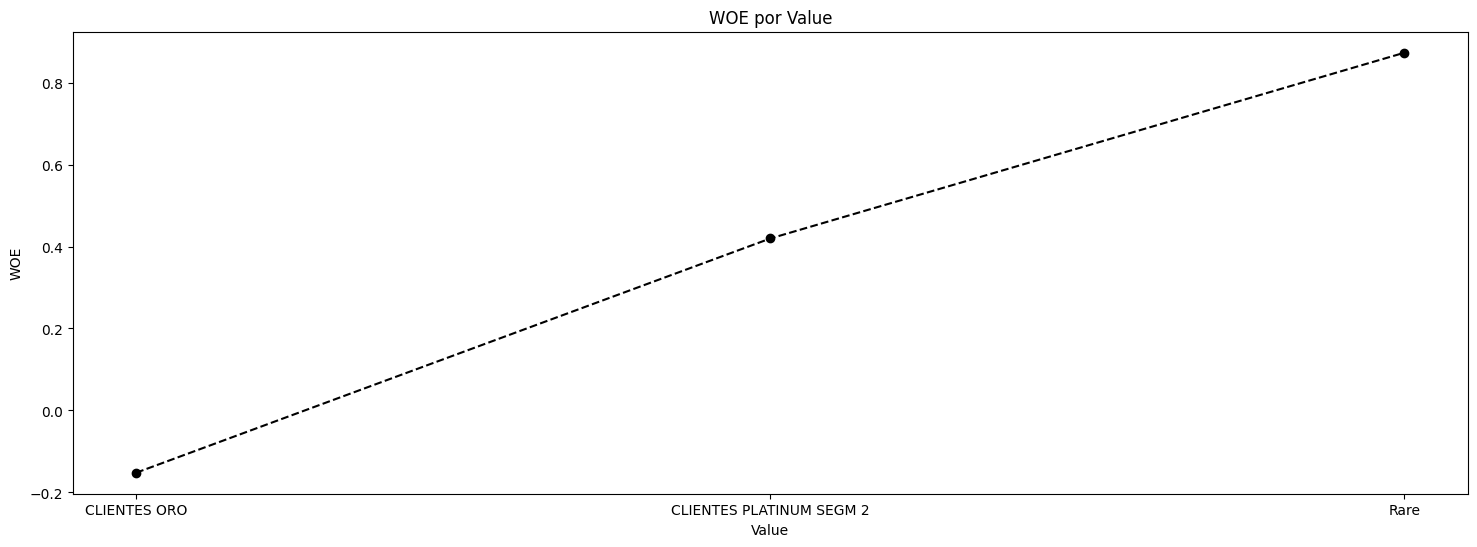

In [ ]:
plot_by_woe(ReporteWoe_v)

### Revisemos esto por variable

### Generemos un reporte con todas los IVs

In [ ]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

In [ ]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

,Feature,IV
5,CLASIF_SISTEMA_ULT_12M,0.139344
6,FLG_PDH,0.107184
7,PROFESION,0.095820
1,SEGMENTOCLIENTE,0.067551
8,ZONA_DEL_DESEMBOLSO,0.060199
9,ESTADO_CIVIL,0.055085
0,FLG_GARANTIA,0.042176
4,HIPOTECARIO_RELACIONADA,0.021914
10,FLG_TC_VISA,0.010919
11,FLG_TC_MC,0.009376


### En este punto, quedémonos solo con las variables cuyo IV es mayor al 5%

In [ ]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL']

### 4.2 Codificación de variables categóricas
### En esta sección buscaremos convertir las variables categóricas de nuestro datasets en numéricos para su inclusión en el modelo

In [ ]:
from feature_engine.encoding import OneHotEncoder

In [ ]:
encoder_1 = OneHotEncoder(
    variables=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'],  # aquí también se puede dejar en None
    drop_last=True,  # generará k-1 variables dummy (donde k es el total de categorias de la variable)
)
encoder_1.fit(X_train_t[cat_cols_2])

OneHotEncoder(drop_last=True,
              variables=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                         'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL'])

In [ ]:
encoder_1.variables_

['SEGMENTOCLIENTE',
 'CLASIF_SISTEMA_ULT_12M',
 'FLG_PDH',
 'PROFESION',
 'ZONA_DEL_DESEMBOLSO',
 'ESTADO_CIVIL']

In [ ]:
# encoder_1.encoder_dict_

In [ ]:
X_train_ohe_enc = encoder_1.transform(X_train_t[cat_cols_2])
X_test_ohe_enc = encoder_1.transform(X_test_t[cat_cols_2])

In [ ]:
X_train_ohe_enc.head()

,SEGMENTOCLIENTE_CLIENTES PLATINUM SEGM 2,SEGMENTOCLIENTE_CLIENTES ORO,CLASIF_SISTEMA_ULT_12M_0.0,CLASIF_SISTEMA_ULT_12M_1.0,CLASIF_SISTEMA_ULT_12M_4.0,CLASIF_SISTEMA_ULT_12M_nan,CLASIF_SISTEMA_ULT_12M_2.0,FLG_PDH_1,PROFESION_ADMINISTRADOR,PROFESION_CONTADOR,...,ZONA_DEL_DESEMBOLSO_MOQUEGUA,ZONA_DEL_DESEMBOLSO_PIURA,ZONA_DEL_DESEMBOLSO_HUANCAVELICA,ZONA_DEL_DESEMBOLSO_AMAZONAS,ZONA_DEL_DESEMBOLSO_TUMBES,ESTADO_CIVIL_SOL,ESTADO_CIVIL_SEP,ESTADO_CIVIL_CAS,ESTADO_CIVIL_VIU,ESTADO_CIVIL_CON
1517,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
27337,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
573,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
31740,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25079,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
encoder_1.get_feature_names_out()

['SEGMENTOCLIENTE_CLIENTES PLATINUM SEGM 2',
 'SEGMENTOCLIENTE_CLIENTES ORO',
 'CLASIF_SISTEMA_ULT_12M_0.0',
 'CLASIF_SISTEMA_ULT_12M_1.0',
 'CLASIF_SISTEMA_ULT_12M_4.0',
 'CLASIF_SISTEMA_ULT_12M_nan',
 'CLASIF_SISTEMA_ULT_12M_2.0',
 'FLG_PDH_1',
 'PROFESION_ADMINISTRADOR',
 'PROFESION_CONTADOR',
 'PROFESION_Rare',
 'PROFESION_TECNICO',
 'PROFESION_INGENIERO',
 'PROFESION_ENFERMERO',
 'PROFESION_TEC MECANICO AUTOMOTRIZ',
 'PROFESION_OBRERO / OPERADOR',
 'PROFESION_ABOGADO',
 'PROFESION_INGENIERO DE SISTEMAS',
 'PROFESION_MECANICO',
 'PROFESION_ECONOMISTA',
 'PROFESION_INGENIERO INDUSTRIAL',
 'ZONA_DEL_DESEMBOLSO_CALLAO',
 'ZONA_DEL_DESEMBOLSO_SAN_MARTIN',
 'ZONA_DEL_DESEMBOLSO_LIMA_NORTE',
 'ZONA_DEL_DESEMBOLSO_AREQUIPA',
 'ZONA_DEL_DESEMBOLSO_LIMA_ESTE',
 'ZONA_DEL_DESEMBOLSO_LORETO',
 'ZONA_DEL_DESEMBOLSO_LA_LIBERTAD',
 'ZONA_DEL_DESEMBOLSO_ANCASH',
 'ZONA_DEL_DESEMBOLSO_LIMA_MODERNA',
 'ZONA_DEL_DESEMBOLSO_JUNIN',
 'ZONA_DEL_DESEMBOLSO_CUZCO',
 'ZONA_DEL_DESEMBOLSO_TACNA',
 'ZONA_DE

In [ ]:
# El codificador que elijamos también se puede incluir en los pipelines anteriormente creados

In [ ]:
from feature_engine.encoding import WoEEncoder

In [ ]:
encoder_2 = WoEEncoder(variables=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'],
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t[cat_cols_2], y_train)

WoEEncoder(fill_value=0,
           variables=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                      'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL'])

In [ ]:
# encoder_2.encoder_dict_

In [ ]:
encoder_2.variables_

['SEGMENTOCLIENTE',
 'CLASIF_SISTEMA_ULT_12M',
 'FLG_PDH',
 'PROFESION',
 'ZONA_DEL_DESEMBOLSO',
 'ESTADO_CIVIL']

In [ ]:
X_train_woe_enc = encoder_2.transform(X_train_t[cat_cols_2])
X_test_woe_enc = encoder_2.transform(X_test_t[cat_cols_2])

In [ ]:
X_train_woe_enc.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL
1517,-0.419546,-0.229072,-0.171220,0.039208,0.238570,0.134467
27337,-0.419546,-0.229072,0.631614,-0.441326,0.073878,0.134467
573,0.151884,-0.229072,-0.171220,-0.273802,0.176343,-0.099129
31740,0.151884,-0.229072,-0.171220,0.247396,-0.136696,-0.424542
25079,-0.419546,0.344459,-0.171220,-0.497639,0.065255,-0.424542


#### Solo con las variables categóricas, probemos un modelo logit usando las codificaciones ya trabajadas

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# Usando el OHE
logit = LogisticRegression(random_state=44, solver='lbfgs')
logit.fit(X_train_ohe_enc, y_train)
pred_train = logit.predict_proba(X_train_ohe_enc)
pred_test = logit.predict_proba(X_test_ohe_enc)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.6977493536830872
Test set
Logistic regression roc-auc: 0.6728379995078031


In [ ]:
GINI_train=2*roc_auc_score(y_train, pred_train[:,1])-1
GINI_test=2*roc_auc_score(y_test, pred_test[:,1])-1
print('El Gini en train es',GINI_train)
print('El Gini en test es',GINI_test)

El Gini en train es 0.39549870736617443
El Gini en test es 0.3456759990156062


In [ ]:
# Usando el WOE Encoder
logit2 = LogisticRegression(random_state=44, solver='lbfgs')
logit2.fit(X_train_woe_enc, y_train)
pred_train2 = logit2.predict_proba(X_train_woe_enc)
pred_test2 = logit2.predict_proba(X_test_woe_enc)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test2[:,1])))

Train set
Logistic regression roc-auc: 0.6961461177465562
Test set
Logistic regression roc-auc: 0.6752053894273834


In [ ]:
GINI2_train=2*roc_auc_score(y_train, pred_train2[:,1])-1
GINI2_test=2*roc_auc_score(y_test, pred_test2[:,1])-1
print('El Gini 2 en train es',GINI2_train)
print('El Gini 2 en test es',GINI2_test)

El Gini 2 en train es 0.39229223549311243
El Gini 2 en test es 0.3504107788547668


### Un pequeño adelanto de como se vería esto usando Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=200, random_state=39)
rf1.fit(X_train_ohe_enc,y_train)
pred_train1 = rf1.predict_proba(X_train_ohe_enc)
pred_test1 = rf1.predict_proba(X_test_ohe_enc)
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train1[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test1[:,1])))

Train set
Random Forests roc-auc: 0.8725860773896792
Test set
Random Forests roc-auc: 0.6159426460335482


In [ ]:
rf2 = RandomForestClassifier(n_estimators=200, random_state=39)
rf2.fit(X_train_woe_enc,y_train)
pred_train2 = rf2.predict_proba(X_train_woe_enc)
pred_test2 = rf2.predict_proba(X_test_woe_enc)
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train2[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test2[:,1])))

Train set
Random Forests roc-auc: 0.8714882290813817
Test set
Random Forests roc-auc: 0.6061117382349438


### Y si usamos GBoosting

In [ ]:
gbc1 = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc1.fit(X_train_ohe_enc, y_train)
pred_train1 = gbc1.predict_proba(X_train_ohe_enc)
pred_test1 = gbc1.predict_proba(X_test_ohe_enc)
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train1[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test1[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.7405618826730389
Test set
Gradient Boosted Trees roc-auc: 0.6682432443592348


In [ ]:
gbc2 = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc2.fit(X_train_woe_enc, y_train)
pred_train2 = gbc2.predict_proba(X_train_woe_enc)
pred_test2 = gbc2.predict_proba(X_test_woe_enc)
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train2[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test2[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.7269353712740678
Test set
Gradient Boosted Trees roc-auc: 0.6714684002078164


## 4.3 Discretización de variables numéricas

In [ ]:
X_train_t.select_dtypes(include=['number']).columns

Index(['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T',
       'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],
      dtype='object')

In [ ]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t)

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['DEUDA', 'PLAZO_CREDITO',
                                     'ATRASO_MAXIMO_ULT_6M',
                                     'ATRASO_MAXIMO_ULT_12M',
                                     'ATRASO_MAXIMO_ULT_24M',
                                     'MESES_AHORROS_ULT_6M',
                                     'MEDIANA_AHORROS_ULT_6M',
                                     'DEUDA_TOTAL_SISTEMA',
                                     'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA',
                                     'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA',
                                     'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])

In [ ]:
disc1.binner_dict_

{'DEUDA': [-inf,
  808.2775,
  1347.129167,
  1979.244840400001,
  2694.258333,
  3768.298333,
  5091.709833,
  6664.541667,
  9330.358333,
  14431.572866000004,
  inf],
 'PLAZO_CREDITO': [-inf, 12.0, 24.0, 36.0, 48.0, inf],
 'ATRASO_MAXIMO_ULT_6M': [-inf, inf],
 'ATRASO_MAXIMO_ULT_12M': [-inf, 1.0, inf],
 'ATRASO_MAXIMO_ULT_24M': [-inf, 1.0, 2.0, inf],
 'MESES_AHORROS_ULT_6M': [-inf, 2.0, 4.0, 5.0, inf],
 'MEDIANA_AHORROS_ULT_6M': [-inf,
  628.66056933,
  1316.0389814000002,
  2114.403666800001,
  3103.3433332,
  4362.920625999999,
  6060.228775000001,
  8444.372589,
  12129.062742,
  21550.643503000036,
  inf],
 'DEUDA_TOTAL_SISTEMA': [-inf,
  55.97200000000002,
  1145.7360000000003,
  2768.354,
  5136.87,
  8824.96,
  14309.662000000008,
  24508.31,
  51966.60400000011,
  inf],
 'NUMERO_DE_PAGOS_PDH': [-inf, 1.0, 4.0, 10.0, 16.0, inf],
 'MONTO_TC_SISTEMA': [-inf,
  478.565,
  1384.8540000000023,
  2888.7290000000007,
  6167.006000000002,
  15684.989000000003,
  inf],
 'INGRESO_CLIEN

In [ ]:
X_train_t=disc1.transform(X_train_t)
X_test_t=disc1.transform(X_test_t)

In [ ]:
X_train_t.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
1517,201403,1518,"(14431.573, inf]","(48.0, inf]",0,nan,CLIENTES PLATINUM SEGM 2,1,0,0,...,"(6636.091, inf]",ADMINISTRADOR,CALLAO,SOL,"(33.0, 35.0]","(19.32, 59.266]","(11900.0, 15110.0]","(157.0, 170.0]",0.0,0.0
27337,201503,27338,"(2694.258, 3768.298]","(36.0, 48.0]",1,nan,CLIENTES PLATINUM SEGM 2,0,0,1,...,"(3224.442, 4319.414]",CONTADOR,SAN_MARTIN,SOL,"(26.0, 28.0]","(980.382, 1861.046]","(15110.0, 18847.6]","(97.0, 128.0]",1.0,1.0
573,201309,574,"(3768.298, 5091.71]","(36.0, 48.0]",0,nan,CLIENTES ORO,0,0,0,...,"(2271.177, 2614.283]",Rare,LIMA_NORTE,SEP,"(40.0, 44.0]","(587.911, 980.382]","(5300.0, 7447.0]","(74.0, 80.0]",1.0,1.0
31740,201505,31741,"(808.278, 1347.129]","(36.0, 48.0]",0,nan,CLIENTES ORO,0,0,0,...,"(2614.283, 3224.442]",TECNICO,AREQUIPA,CAS,"(44.0, 51.0]","(587.911, 980.382]","(18847.6, 23850.0]","(74.0, 80.0]",1.0,1.0
25079,201504,25080,"(1979.245, 2694.258]","(12.0, 24.0]",0,nan,CLIENTES PLATINUM SEGM 2,1,0,1,...,"(6636.091, inf]",INGENIERO,LIMA_ESTE,CAS,"(44.0, 51.0]","(1861.046, inf]","(11900.0, 15110.0]","(170.0, inf]",0.0,0.0


Text(0, 0.5, 'Nro de Observaciones por Bin')

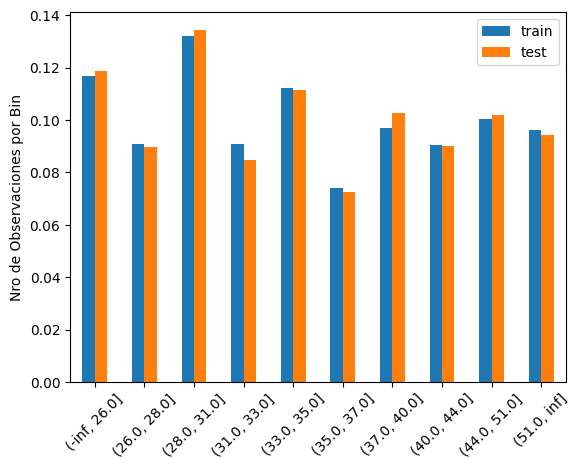

In [ ]:
t1 = X_train_t['EDAD_T'].value_counts(normalize=True).sort_index()
t2 = X_test_t['EDAD_T'].value_counts(normalize=True).sort_index()
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Nro de Observaciones por Bin')

### Probar con el resto de variables numéricas

#### Ya que binarizamos nuestras variables numéricas, podemos tratarla como categóricas, es decir, calcularles el WOE y codificarlas para entrenarlas.

In [ ]:
tot_train_t=pd.concat([X_train_t, y_train], axis=1)
tot_train_t.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,201403,1518,"(14431.573, inf]","(48.0, inf]",0,nan,CLIENTES PLATINUM SEGM 2,1,0,0,...,ADMINISTRADOR,CALLAO,SOL,"(33.0, 35.0]","(19.32, 59.266]","(11900.0, 15110.0]","(157.0, 170.0]",0.0,0.0,0
27337,201503,27338,"(2694.258, 3768.298]","(36.0, 48.0]",1,nan,CLIENTES PLATINUM SEGM 2,0,0,1,...,CONTADOR,SAN_MARTIN,SOL,"(26.0, 28.0]","(980.382, 1861.046]","(15110.0, 18847.6]","(97.0, 128.0]",1.0,1.0,0
573,201309,574,"(3768.298, 5091.71]","(36.0, 48.0]",0,nan,CLIENTES ORO,0,0,0,...,Rare,LIMA_NORTE,SEP,"(40.0, 44.0]","(587.911, 980.382]","(5300.0, 7447.0]","(74.0, 80.0]",1.0,1.0,0
31740,201505,31741,"(808.278, 1347.129]","(36.0, 48.0]",0,nan,CLIENTES ORO,0,0,0,...,TECNICO,AREQUIPA,CAS,"(44.0, 51.0]","(587.911, 980.382]","(18847.6, 23850.0]","(74.0, 80.0]",1.0,1.0,0
25079,201504,25080,"(1979.245, 2694.258]","(12.0, 24.0]",0,nan,CLIENTES PLATINUM SEGM 2,1,0,1,...,INGENIERO,LIMA_ESTE,CAS,"(44.0, 51.0]","(1861.046, inf]","(11900.0, 15110.0]","(170.0, inf]",0.0,0.0,0


In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(tot_train_t, "EDAD_T", "FLG_DEFAULT_12M")
IV_v

0.07974073980822557

In [ ]:
ReporteWoe_v

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
6,"(-inf, 26.0]",2612,2370,242,0.113164,0.170783,-0.411555,0.023713
1,"(26.0, 28.0]",2028,1865,163,0.089051,0.115032,-0.255996,0.006651
0,"(33.0, 35.0]",2507,2330,177,0.111254,0.124912,-0.115789,0.001581
7,"(28.0, 31.0]",2950,2755,195,0.131548,0.137615,-0.045089,0.000274
9,"(31.0, 33.0]",2027,1894,133,0.090436,0.093860,-0.037165,0.000127
8,"(35.0, 37.0]",1652,1551,101,0.074058,0.071277,0.038272,0.000106
5,"(37.0, 40.0]",2171,2052,119,0.097980,0.083980,0.154184,0.002159
2,"(40.0, 44.0]",2019,1914,105,0.091391,0.074100,0.209728,0.003626
3,"(44.0, 51.0]",2244,2131,113,0.101752,0.079746,0.243696,0.005363
4,"(51.0, inf]",2150,2081,69,0.099365,0.048694,0.713235,0.036140


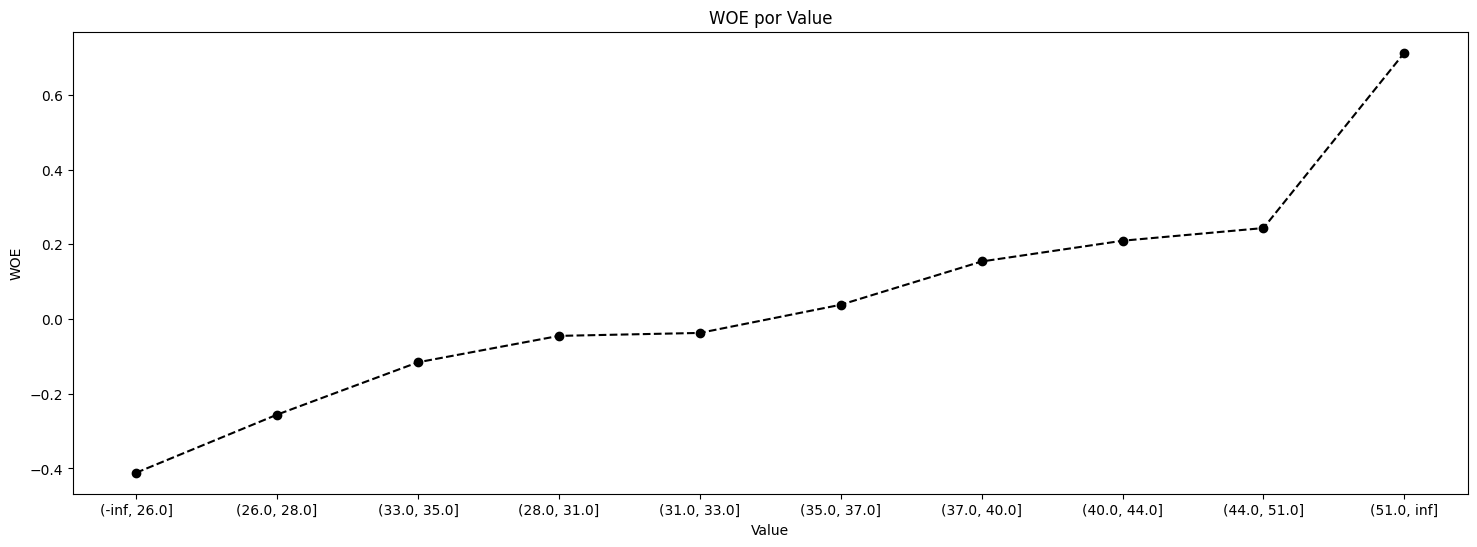

In [ ]:
plot_by_woe(ReporteWoe_v)

### Verificar el resto de variables numéricas (Ejercicio)

### Veamos cuales son las variables numéricas más importantes, basado en su IV

In [ ]:
getFeatureIV_Importance(tot_train_t,num_cols,"FLG_DEFAULT_12M")

,Feature,IV
6,MEDIANA_AHORROS_ULT_6M,0.358339
10,INGRESO_CLIENTE,0.337741
5,MESES_AHORROS_ULT_6M,0.201981
8,NUMERO_DE_PAGOS_PDH,0.183294
1,PLAZO_CREDITO,0.173877
13,LINEA_DE_TC,0.082388
11,EDAD_T,0.079741
14,MONTO_TC_MEMBRESIA,0.058139
0,DEUDA,0.046217
4,ATRASO_MAXIMO_ULT_24M,0.034082


### Ahora, codifiquémoslas como a las variables categóricas

In [ ]:
num_cols_2=['PLAZO_CREDITO','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
            'EDAD_T','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
encoder_3 = OneHotEncoder(
    variables=['PLAZO_CREDITO','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
              'EDAD_T','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],  # aquí también se puede dejar en None
    drop_last=True,  # generará k-1 variables dummy (donde k es el total de categorias de la variable)
)
encoder_3.fit(X_train_t[num_cols_2])

OneHotEncoder(drop_last=True,
              variables=['PLAZO_CREDITO', 'MESES_AHORROS_ULT_6M',
                         'MEDIANA_AHORROS_ULT_6M', 'NUMERO_DE_PAGOS_PDH',
                         'INGRESO_CLIENTE', 'EDAD_T', 'LINEA_DE_TC',
                         'MONTO_TC_MEMBRESIA'])

In [ ]:
X_train_ohe_enc2 = encoder_3.transform(X_train_t[num_cols_2])
X_test_ohe_enc2 = encoder_3.transform(X_test_t[num_cols_2])

In [ ]:
X_train_ohe_enc2.head()

,"PLAZO_CREDITO_(48.0, inf]","PLAZO_CREDITO_(36.0, 48.0]","PLAZO_CREDITO_(12.0, 24.0]","PLAZO_CREDITO_(-inf, 12.0]","MESES_AHORROS_ULT_6M_(5.0, inf]","MESES_AHORROS_ULT_6M_(-inf, 2.0]","MESES_AHORROS_ULT_6M_(2.0, 4.0]","MEDIANA_AHORROS_ULT_6M_(12129.063, 21550.644]","MEDIANA_AHORROS_ULT_6M_(6060.229, 8444.373]","MEDIANA_AHORROS_ULT_6M_(4362.921, 6060.229]",...,"LINEA_DE_TC_(1979.9, 3600.0]","LINEA_DE_TC_(7447.0, 9609.0]","LINEA_DE_TC_(3600.0, 5300.0]","MONTO_TC_MEMBRESIA_(157.0, 170.0]","MONTO_TC_MEMBRESIA_(97.0, 128.0]","MONTO_TC_MEMBRESIA_(74.0, 80.0]","MONTO_TC_MEMBRESIA_(170.0, inf]","MONTO_TC_MEMBRESIA_(60.0, 74.0]","MONTO_TC_MEMBRESIA_(80.0, 97.0]","MONTO_TC_MEMBRESIA_(-inf, 60.0]"
1517,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
27337,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
573,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
31740,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
25079,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
encoder_4 = WoEEncoder(variables=['PLAZO_CREDITO','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
                                  'EDAD_T','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t[num_cols_2], y_train)

WoEEncoder(fill_value=0,
           variables=['PLAZO_CREDITO', 'MESES_AHORROS_ULT_6M',
                      'MEDIANA_AHORROS_ULT_6M', 'NUMERO_DE_PAGOS_PDH',
                      'INGRESO_CLIENTE', 'EDAD_T', 'LINEA_DE_TC',
                      'MONTO_TC_MEMBRESIA'])

In [ ]:
X_train_woe_enc2 = encoder_4.transform(X_train_t[num_cols_2])
X_test_woe_enc2 = encoder_4.transform(X_test_t[num_cols_2])

### Al igual que con las variables categóricas, probemos con las variables numéricas, un modelo preliminar

In [ ]:
# Usando el OHE
logit = LogisticRegression(random_state=44, solver='lbfgs')
logit.fit(X_train_ohe_enc2, y_train)
pred_train = logit.predict_proba(X_train_ohe_enc2)
pred_test = logit.predict_proba(X_test_ohe_enc2)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.7572968582162607
Test set
Logistic regression roc-auc: 0.7496331004421147


In [ ]:
GINI_train=2*roc_auc_score(y_train, pred_train[:,1])-1
GINI_test=2*roc_auc_score(y_test, pred_test[:,1])-1
print('El Gini en train es',GINI_train)
print('El Gini en test es',GINI_test)

El Gini en train es 0.5145937164325214
El Gini en test es 0.49926620088422946


In [ ]:
# Usemos el WOE Encoder
logit2 = LogisticRegression(random_state=44, solver='lbfgs')
logit2.fit(X_train_woe_enc2, y_train)
pred_train2 = logit2.predict_proba(X_train_woe_enc2)
pred_test2 = logit2.predict_proba(X_test_woe_enc2)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test2[:,1])))

Train set
Logistic regression roc-auc: 0.7396352825262751
Test set
Logistic regression roc-auc: 0.7431939833794545


In [ ]:
GINI_train2=2*roc_auc_score(y_train, pred_train2[:,1])-1
GINI_test2=2*roc_auc_score(y_test, pred_test2[:,1])-1
print('El Gini en train es',GINI_train2)
print('El Gini en test es',GINI_test2)

El Gini en train es 0.47927056505255017
El Gini en test es 0.48638796675890905


### Y qué pasa si ahora uno los dos tipos de variables en un solo modelo preliminar

In [ ]:
logit_mix = LogisticRegression(random_state=44, solver='lbfgs')
logit_mix.fit(pd.concat([X_train_ohe_enc,X_train_ohe_enc2],axis=1), y_train)
pred_train_mix = logit_mix.predict_proba(pd.concat([X_train_ohe_enc,X_train_ohe_enc2],axis=1))
pred_test_mix = logit_mix.predict_proba(pd.concat([X_test_ohe_enc,X_test_ohe_enc2],axis=1))
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_mix[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_mix[:,1])))

Train set
Logistic regression roc-auc: 0.7803892953926663
Test set
Logistic regression roc-auc: 0.7629702228227767


In [ ]:
GINI_train_mix=2*roc_auc_score(y_train, pred_train_mix[:,1])-1
GINI_test_mix=2*roc_auc_score(y_test, pred_test_mix[:,1])-1
print('El Gini en train es',GINI_train_mix)
print('El Gini en test es',GINI_test_mix)

El Gini en train es 0.5607785907853327
El Gini en test es 0.5259404456455534
